In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# “Análisis de Tiempos de Entrega y Factores que los Afectan”

# CARGA DE DATA

In [2]:
data_train = pd.read_csv("train.csv")

In [3]:
data_train.head(3)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26


In [4]:
data_test_pre = pd.read_csv("test.csv")

In [5]:
data_test_pre.head(3)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City
0,0x2318,COIMBRES13DEL01,NaN,NaN,11.003669,76.976494,11.043669,77.016494,30-03-2022,NaN,15:05:00,conditions NaN,NaN,3,Drinks,electric_scooter,1,No,Metropolitian
1,0x3474,BANGRES15DEL01,28,4.6,12.975377,77.696664,13.085377,77.806664,29-03-2022,20:30:00,20:35:00,conditions Windy,Jam,0,Snack,motorcycle,1,No,Metropolitian
2,0x9420,JAPRES09DEL03,23,4.5,26.911378,75.789034,27.001378,75.879034,10-03-2022,19:35:00,19:45:00,conditions Stormy,Jam,0,Drinks,motorcycle,1,No,Metropolitian


In [6]:
sample = pd.read_csv("Sample_Submission.csv")

In [7]:
sample.head(3)

,ID,Time_taken (min)
0,0x2318,25.668333
1,0x3474,27.881667
2,0x9420,27.023333


In [8]:
data_test = data_test_pre.merge(sample, how = "left")

In [9]:
data_test.head(3)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0x2318,COIMBRES13DEL01,NaN,NaN,11.003669,76.976494,11.043669,77.016494,30-03-2022,NaN,15:05:00,conditions NaN,NaN,3,Drinks,electric_scooter,1,No,Metropolitian,25.668333
1,0x3474,BANGRES15DEL01,28,4.6,12.975377,77.696664,13.085377,77.806664,29-03-2022,20:30:00,20:35:00,conditions Windy,Jam,0,Snack,motorcycle,1,No,Metropolitian,27.881667
2,0x9420,JAPRES09DEL03,23,4.5,26.911378,75.789034,27.001378,75.879034,10-03-2022,19:35:00,19:45:00,conditions Stormy,Jam,0,Drinks,motorcycle,1,No,Metropolitian,27.023333


# Exploración Inicial

#### Nombres de las Columnas

In [10]:
data_train.shape

(45593, 20)

In [11]:
data_test.shape

(11399, 20)

In [12]:
list(data_train.columns)

['ID',
 'Delivery_person_ID',
 'Delivery_person_Age',
 'Delivery_person_Ratings',
 'Restaurant_latitude',
 'Restaurant_longitude',
 'Delivery_location_latitude',
 'Delivery_location_longitude',
 'Order_Date',
 'Time_Orderd',
 'Time_Order_picked',
 'Weatherconditions',
 'Road_traffic_density',
 'Vehicle_condition',
 'Type_of_order',
 'Type_of_vehicle',
 'multiple_deliveries',
 'Festival',
 'City',
 'Time_taken(min)']

 - ID',
 - 'ID del repartidor',
 - 'Edad del repartidor',
 - 'Calificaciones del repartidor',
 - 'Latitud del restaurante',
 -  'Longitud del restaurante',
 -  'Latitud del lugar de entrega',
 -  'Longitud del lugar de entrega',
 -  'Fecha del pedido',
 - 'Hora del pedido',
 -  'Hora de recogida del pedido',
 - 'Condiciones meteorológicas',
 -  'Densidad del tráfico rodado',
 -  'Estado del vehículo',
 - 'Tipo de pedido',
 -  'Tipo de vehículo',
 - 'Entregas múltiples',
 -  'Festival',
 -  'Ciudad',
 -  'Tiempo de espera (min)'
  

In [13]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  object 
 3   Delivery_person_Ratings      45593 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  45593 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            45593 non-null  object 
 12  Road_traffic_density         45593 non-null  object 
 13  Vehicle_conditio

In [14]:
data_train.describe()

,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition
count,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000
mean,17.017729,70.231332,17.465186,70.845702,1.023359
std,8.185109,22.883647,7.335122,21.118812,0.839065
min,-30.905562,-88.366217,0.010000,0.010000,0.000000
25%,12.933284,73.170000,12.988453,73.280000,0.000000
50%,18.546947,75.898497,18.633934,76.002574,1.000000
75%,22.728163,78.044095,22.785049,78.107044,2.000000
max,30.914057,88.433452,31.054057,88.563452,3.000000


In [15]:
data_train.isnull().sum()

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Order_Date                     0
Time_Orderd                    0
Time_Order_picked              0
Weatherconditions              0
Road_traffic_density           0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
multiple_deliveries            0
Festival                       0
City                           0
Time_taken(min)                0
dtype: int64

## Tranformar variables segun correspondan

## Train

In [16]:
# Reemplazar falsos nulos 
data_train.replace(["NaN", "NaN ", " NaN", "nan", "None", "null", "NULL", " ", ""], pd.NA, inplace=True)

In [17]:
# Delivery_person_Age convertir a numérico
data_train["Delivery_person_Age"] = pd.to_numeric(
    data_train["Delivery_person_Age"], 
    errors="coerce"
)

# Delivery_person_Ratings convertir a numérico 
data_train["Delivery_person_Ratings"] = pd.to_numeric(
    data_train["Delivery_person_Ratings"],
    errors="coerce"
)

# Time_taken(min)  extraer solo el número y convertir a int
data_train["Time_taken(min)"] = data_train["Time_taken(min)"].astype(str).str.extract(r'(\d+)').astype(int)

In [18]:
data_train[["Delivery_person_Age", "Delivery_person_Ratings", "Time_taken(min)"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Delivery_person_Age      43739 non-null  float64
 1   Delivery_person_Ratings  43685 non-null  float64
 2   Time_taken(min)          45593 non-null  int32  
dtypes: float64(2), int32(1)
memory usage: 890.6 KB


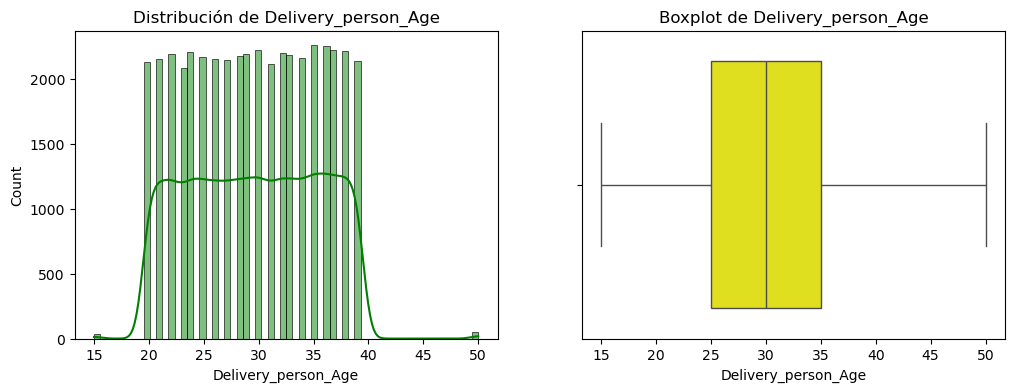

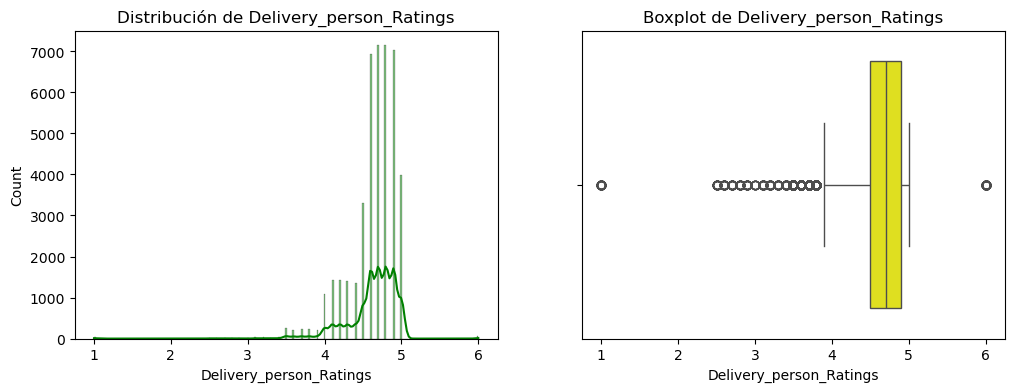

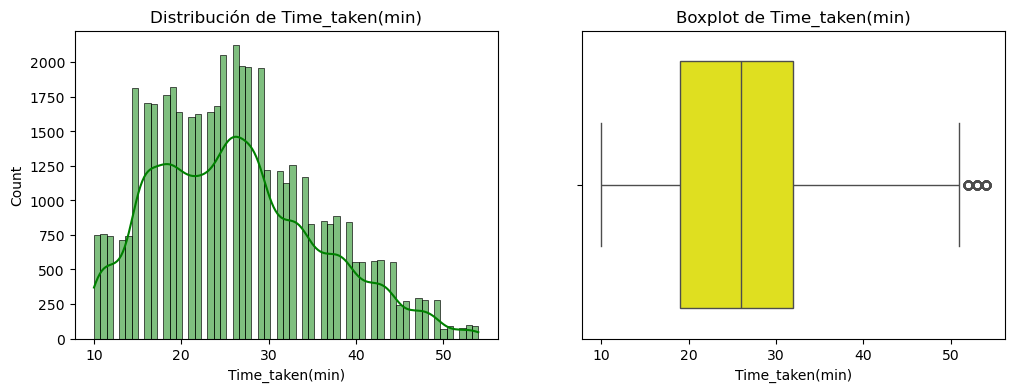

In [19]:
cols = ["Delivery_person_Age", "Delivery_person_Ratings", "Time_taken(min)"]

for col in cols:
    fig, axes = plt.subplots(1, 2, figsize=(12,4))
    
    # Histograma con KDE
    sns.histplot(data=data_train, x=col, kde=True, color = "Green", ax=axes[0])
    axes[0].set_title(f"Distribución de {col}")
    
    # Boxplot para detectar outliers
    sns.boxplot(data=data_train, x=col, color = "Yellow", ax=axes[1])
    axes[1].set_title(f"Boxplot de {col}")
    
    plt.show()

In [20]:
# Convertir fecha del pedido
data_train["Order_Date"] = pd.to_datetime(
    data_train["Order_Date"], 
    dayfirst=True, errors="coerce"
)

# Convertir hora en que se ordenó 
data_train["Time_Orderd"] = pd.to_datetime(
    data_train["Time_Orderd"], 
    format="%H:%M:%S", errors="coerce"
)

# Convertir hora en que se recogió
data_train["Time_Order_picked"] = pd.to_datetime(
    data_train["Time_Order_picked"], 
    format="%H:%M:%S", errors = "coerce"
)

In [21]:
data_train["Time_Order_picked"].head(5)

0   1900-01-01 11:45:00
1   1900-01-01 19:50:00
2   1900-01-01 08:45:00
3   1900-01-01 18:10:00
4   1900-01-01 13:45:00
Name: Time_Order_picked, dtype: datetime64[ns]

In [22]:
# Lista de columnas categóricas
cat_cols = ["Weatherconditions", "Road_traffic_density", "Festival", "City", 
            "Type_of_order", "Type_of_vehicle", "multiple_deliveries"]

# Convertir cada una a tipo category
for col in cat_cols:
    data_train[col] = data_train[col].astype("category")

In [23]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   ID                           45593 non-null  object        
 1   Delivery_person_ID           45593 non-null  object        
 2   Delivery_person_Age          43739 non-null  float64       
 3   Delivery_person_Ratings      43685 non-null  float64       
 4   Restaurant_latitude          45593 non-null  float64       
 5   Restaurant_longitude         45593 non-null  float64       
 6   Delivery_location_latitude   45593 non-null  float64       
 7   Delivery_location_longitude  45593 non-null  float64       
 8   Order_Date                   45593 non-null  datetime64[ns]
 9   Time_Orderd                  43862 non-null  datetime64[ns]
 10  Time_Order_picked            45593 non-null  datetime64[ns]
 11  Weatherconditions            45593 non-nu

In [24]:
data_train.describe()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Vehicle_condition,Time_taken(min)
count,43739.000000,43685.000000,45593.000000,45593.000000,45593.000000,45593.000000,45593,43862,45593,45593.000000,45593.000000
mean,29.567137,4.633780,17.017729,70.231332,17.465186,70.845702,2022-03-13 16:32:53.987235072,1900-01-01 17:54:59.856367616,1900-01-01 17:37:17.389511424,1.023359,26.294607
min,15.000000,1.000000,-30.905562,-88.366217,0.010000,0.010000,2022-02-11 00:00:00,1900-01-01 00:00:00,1900-01-01 00:00:00,0.000000,10.000000
25%,25.000000,4.500000,12.933284,73.170000,12.988453,73.280000,2022-03-04 00:00:00,1900-01-01 15:25:00,1900-01-01 14:35:00,0.000000,19.000000
50%,30.000000,4.700000,18.546947,75.898497,18.633934,76.002574,2022-03-15 00:00:00,1900-01-01 19:15:00,1900-01-01 19:10:00,1.000000,26.000000
75%,35.000000,4.900000,22.728163,78.044095,22.785049,78.107044,2022-03-27 00:00:00,1900-01-01 21:35:00,1900-01-01 21:35:00,2.000000,32.000000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,2022-04-06 00:00:00,1900-01-01 23:55:00,1900-01-01 23:55:00,3.000000,54.000000
std,5.815155,0.334716,8.185109,22.883647,7.335122,21.118812,NaN,NaN,NaN,0.839065,9.383806


In [25]:
data_train["Time_taken(min)"].unique()

array([24, 33, 26, 21, 30, 40, 32, 34, 46, 23, 20, 41, 15, 36, 39, 18, 38,
       47, 12, 22, 25, 35, 10, 19, 11, 28, 52, 16, 27, 49, 17, 14, 37, 44,
       42, 31, 13, 29, 50, 43, 48, 54, 53, 45, 51])

In [26]:
data_train["multiple_deliveries"].unique()

['0', '1', '3', NaN, '2']
Categories (4, object): ['0', '1', '2', '3']

In [27]:
data_train.isnull().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weatherconditions                 0
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken(min)                   0
dtype: int64

In [28]:
# Filtrar columnas con nulos
data_train.isnull().sum()[data_train.isnull().sum() > 0]

Delivery_person_Age        1854
Delivery_person_Ratings    1908
Time_Orderd                1731
Road_traffic_density        601
multiple_deliveries         993
Festival                    228
City                       1200
dtype: int64

In [29]:
data_train["Delivery_person_Age"] = data_train["Delivery_person_Age"].fillna(data_train["Delivery_person_Age"].median())
data_train["Delivery_person_Ratings"] = data_train["Delivery_person_Ratings"].fillna(data_train["Delivery_person_Ratings"].median())

In [30]:
promedio_to = data_train["Time_Orderd"].dropna().mean()
data_train["Time_Orderd"] = data_train["Time_Orderd"].fillna(promedio_to)

<Axes: xlabel='Road_traffic_density', ylabel='count'>

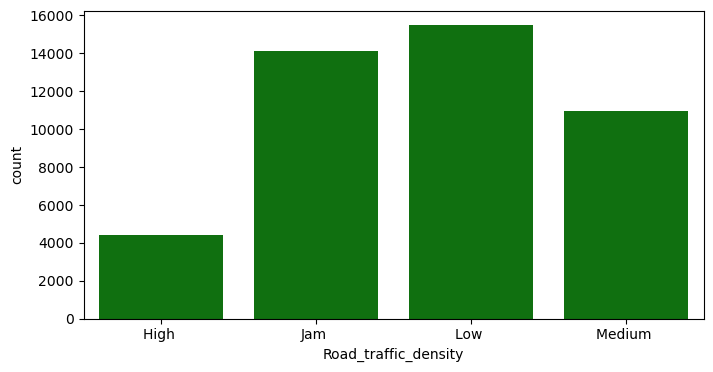

In [31]:
plt.figure(figsize = (8,4))
sns.countplot(x = data_train["Road_traffic_density"], color = "Green")

In [32]:
data_train["Road_traffic_density"] = data_train["Road_traffic_density"].fillna(
    data_train["Road_traffic_density"].mode()[0]
)

<Axes: xlabel='multiple_deliveries', ylabel='count'>

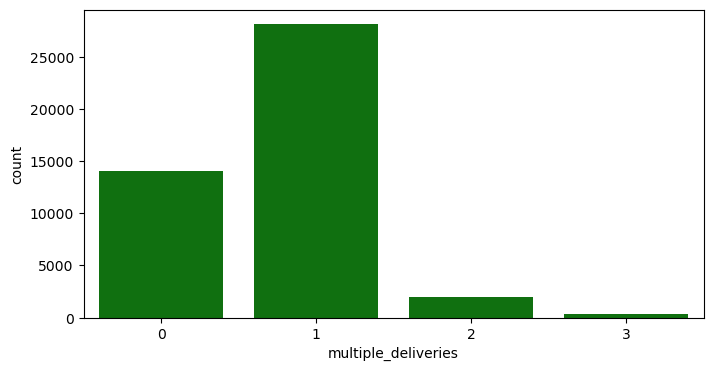

In [33]:
plt.figure(figsize = (8,4))
sns.countplot(x = data_train["multiple_deliveries"], color = "Green")

In [34]:
data_train["multiple_deliveries"] = data_train["multiple_deliveries"].fillna(
    data_train["multiple_deliveries"].mode()[0]
)

<Axes: xlabel='Festival', ylabel='count'>

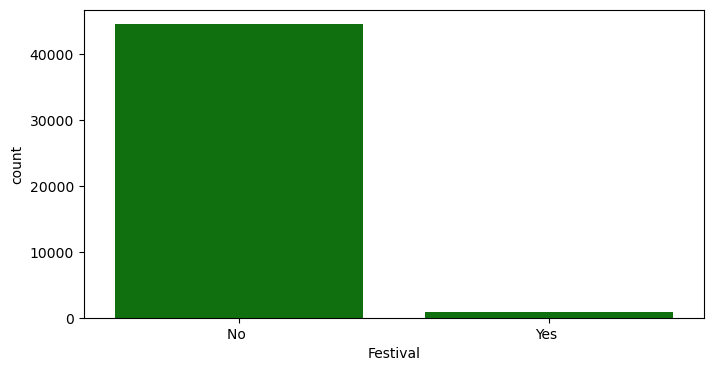

In [35]:
plt.figure(figsize = (8,4))
sns.countplot(x = data_train["Festival"], color = "Green")

In [36]:
data_train["Festival"] = data_train["Festival"].fillna(data_train["Festival"].mode()[0])

<Axes: xlabel='City', ylabel='count'>

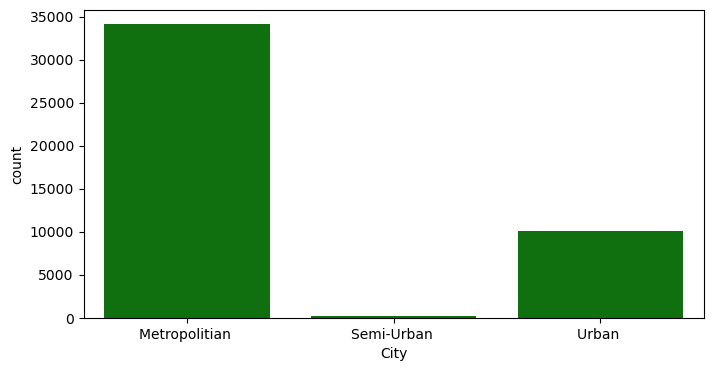

In [37]:
plt.figure(figsize = (8,4))
sns.countplot(x = data_train["City"], color = "Green")

In [38]:
data_train["City"] = data_train["City"].fillna(data_train["City"].mode()[0])

In [39]:
data_train["Delivery_person_Age"] = data_train["Delivery_person_Age"].astype(int)

In [40]:
data_train.isnull().sum()

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Order_Date                     0
Time_Orderd                    0
Time_Order_picked              0
Weatherconditions              0
Road_traffic_density           0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
multiple_deliveries            0
Festival                       0
City                           0
Time_taken(min)                0
dtype: int64

In [41]:
data_train["Weatherconditions"].unique()

['conditions Sunny', 'conditions Stormy', 'conditions Sandstorms', 'conditions Cloudy', 'conditions Fog', 'conditions Windy', 'conditions NaN']
Categories (7, object): ['conditions Cloudy', 'conditions Fog', 'conditions NaN', 'conditions Sandstorms', 'conditions Stormy', 'conditions Sunny', 'conditions Windy']

In [42]:
# Eliminamos el prefijo conditions 
data_train["Weatherconditions"] = data_train["Weatherconditions"].str.replace("conditions", "", regex=False)

In [43]:
# Quitamos espacios 
data_train["Weatherconditions"] = data_train["Weatherconditions"].str.strip()

# Reemplazamos valores que parecen nulos por NaN real
data_train["Weatherconditions"] = data_train["Weatherconditions"].replace(
    ["Nan", "NaN", "none", "null", "?", "", " "],
    pd.NA   
)
print(data_train["Weatherconditions"].unique())

['Sunny' 'Stormy' 'Sandstorms' 'Cloudy' 'Fog' 'Windy' <NA>]


<Axes: xlabel='Weatherconditions', ylabel='count'>

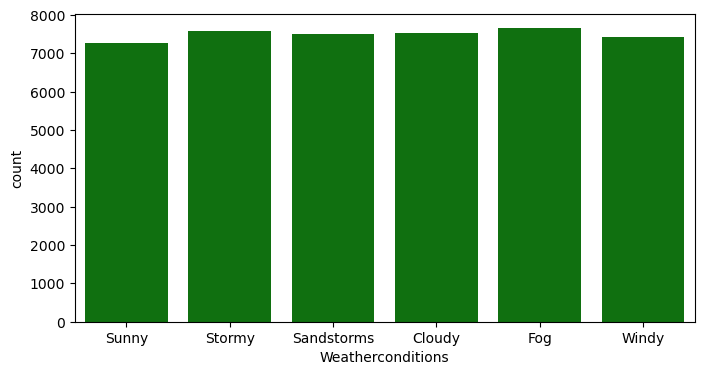

In [44]:
plt.figure(figsize = (8,4))
sns.countplot(x = data_train["Weatherconditions"], color = "Green")

In [45]:
data_train.isnull().sum()[data_train.isnull().sum() > 0]

Weatherconditions    616
dtype: int64

In [46]:
# Antes del relleno
data_train["Weatherconditions"].value_counts(normalize=True, dropna=True).round(4) * 100

Weatherconditions
Fog           17.02
Stormy        16.87
Cloudy        16.76
Sandstorms    16.66
Windy         16.50
Sunny         16.19
Name: proportion, dtype: float64

In [47]:
# Después del relleno
moda = data_train["Weatherconditions"].mode()[0]
data_train["Weatherconditions"] = data_train["Weatherconditions"].fillna(moda)

data_train["Weatherconditions"].value_counts(normalize=True).round(4) * 100

Weatherconditions
Fog           18.14
Stormy        16.64
Cloudy        16.53
Sandstorms    16.44
Windy         16.28
Sunny         15.98
Name: proportion, dtype: float64

In [48]:
#preguntar sobre el tema de sesgo

In [49]:
data_train["Weatherconditions"] = data_train["Weatherconditions"].astype("category")

In [50]:
data_train["Weatherconditions"].unique()

['Sunny', 'Stormy', 'Sandstorms', 'Cloudy', 'Fog', 'Windy']
Categories (6, object): ['Cloudy', 'Fog', 'Sandstorms', 'Stormy', 'Sunny', 'Windy']

In [51]:
data_train["Road_traffic_density"].unique()

['High ', 'Jam ', 'Low ', 'Medium ']
Categories (4, object): ['High ', 'Jam ', 'Low ', 'Medium ']

In [52]:
data_train["Road_traffic_density"] = data_train["Road_traffic_density"].astype("object")
data_train["Road_traffic_density"] = data_train["Road_traffic_density"].str.strip().replace({"Jam": "High"})
data_train["Road_traffic_density"] = data_train["Road_traffic_density"].astype("category")

In [53]:
data_train["Road_traffic_density"].unique()

['High', 'Low', 'Medium']
Categories (3, object): ['High', 'Low', 'Medium']

In [54]:
data_train["Type_of_order"].unique()

['Snack ', 'Drinks ', 'Buffet ', 'Meal ']
Categories (4, object): ['Buffet ', 'Drinks ', 'Meal ', 'Snack ']

In [55]:
data_train["Type_of_order"] = data_train["Type_of_order"].str.strip().astype("category")

In [56]:
data_train["Type_of_order"].unique()

['Snack', 'Drinks', 'Buffet', 'Meal']
Categories (4, object): ['Buffet', 'Drinks', 'Meal', 'Snack']

In [57]:
data_train["Type_of_vehicle"].unique()

['motorcycle ', 'scooter ', 'electric_scooter ', 'bicycle ']
Categories (4, object): ['bicycle ', 'electric_scooter ', 'motorcycle ', 'scooter ']

In [58]:
data_train["Type_of_vehicle"] = data_train["Type_of_vehicle"].str.strip().astype("category")

In [59]:
data_train["Type_of_vehicle"].unique()

['motorcycle', 'scooter', 'electric_scooter', 'bicycle']
Categories (4, object): ['bicycle', 'electric_scooter', 'motorcycle', 'scooter']

In [60]:
data_train["Festival"].unique()

['No ', 'Yes ']
Categories (2, object): ['No ', 'Yes ']

In [61]:
data_train["Festival"] = data_train["Festival"].str.strip().astype("category")

In [62]:
data_train["Festival"].unique()

['No', 'Yes']
Categories (2, object): ['No', 'Yes']

In [63]:
data_train["City"].unique()

['Urban ', 'Metropolitian ', 'Semi-Urban ']
Categories (3, object): ['Metropolitian ', 'Semi-Urban ', 'Urban ']

In [64]:
data_train["City"] = data_train["City"].astype("object")
data_train["City"] = data_train["City"].str.strip().replace({
    "Semi-Urban": "Urban",
    "Metropolitian": "Metropolitan"
})
data_train["City"] = data_train["City"].astype("category")

In [65]:
(data_train["City"].unique())

['Urban', 'Metropolitan']
Categories (2, object): ['Metropolitan', 'Urban']

In [66]:
data_train.isnull().sum()

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Order_Date                     0
Time_Orderd                    0
Time_Order_picked              0
Weatherconditions              0
Road_traffic_density           0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
multiple_deliveries            0
Festival                       0
City                           0
Time_taken(min)                0
dtype: int64

## Test

In [67]:
# Reemplazar falsos nulos 
data_test.replace(["NaN", "NaN ", "nan", "None", "null", "NULL", " ", ""], pd.NA, inplace=True)

In [68]:
data_test = data_test.rename(columns={
    "Time_taken (min)": "Time_taken(min)"
})

In [69]:
data_test["Delivery_person_Age"] = pd.to_numeric(
   data_test["Delivery_person_Age"], 
    errors="coerce"
)

data_test["Delivery_person_Ratings"] = pd.to_numeric(
    data_test["Delivery_person_Ratings"],
    errors="coerce"
)

data_test["Time_taken(min)"] = data_test["Time_taken(min)"].astype(str).str.extract(r'(\d+)').astype(int)

In [70]:
data_test["Order_Date"] = pd.to_datetime(
    data_test["Order_Date"], 
    dayfirst=True, errors="coerce"
)

data_test["Time_Orderd"] = pd.to_datetime(
    data_test["Time_Orderd"], 
    format="%H:%M:%S", errors="coerce"
)

data_test["Time_Order_picked"] = pd.to_datetime(
    data_test["Time_Order_picked"], 
    format="%H:%M:%S", errors = "coerce"
)

In [71]:
cat_cols = ["Weatherconditions", "Road_traffic_density", "Festival", "City", 
            "Type_of_order", "Type_of_vehicle", "multiple_deliveries"]
for col in cat_cols:
    data_test[col] = data_test[col].astype("category")

In [72]:
data_test.isnull().sum()

ID                               0
Delivery_person_ID               0
Delivery_person_Age            491
Delivery_person_Ratings        507
Restaurant_latitude              0
Restaurant_longitude             0
Delivery_location_latitude       0
Delivery_location_longitude      0
Order_Date                       0
Time_Orderd                    444
Time_Order_picked                0
Weatherconditions                0
Road_traffic_density           154
Vehicle_condition                0
Type_of_order                    0
Type_of_vehicle                  0
multiple_deliveries            238
Festival                        65
City                           324
Time_taken(min)                  0
dtype: int64

In [73]:
data_test["Delivery_person_Age"] = data_test["Delivery_person_Age"].fillna(data_test["Delivery_person_Age"].median())
data_test["Delivery_person_Ratings"] = data_test["Delivery_person_Ratings"].fillna(data_test["Delivery_person_Ratings"].median())

In [74]:
promedio_to = data_test["Time_Orderd"].dropna().mean()
data_test["Time_Orderd"] = data_test["Time_Orderd"].fillna(promedio_to)

In [75]:
data_test["Road_traffic_density"] = data_test["Road_traffic_density"].fillna(
    data_test["Road_traffic_density"].mode()[0]
)

data_test["multiple_deliveries"] = data_test["multiple_deliveries"].fillna(
    data_test["multiple_deliveries"].mode()[0]
)

data_test["Festival"] = data_test["Festival"].fillna(data_test["Festival"].mode()[0])

data_test["City"] = data_test["City"].fillna(data_test["City"].mode()[0])

In [76]:
data_test.isnull().sum()

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Order_Date                     0
Time_Orderd                    0
Time_Order_picked              0
Weatherconditions              0
Road_traffic_density           0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
multiple_deliveries            0
Festival                       0
City                           0
Time_taken(min)                0
dtype: int64

In [77]:
data_test["Delivery_person_Age"] = data_test["Delivery_person_Age"].astype(int)

In [78]:
data_test["Weatherconditions"] = data_test["Weatherconditions"].str.replace("conditions", "", regex=False)
data_test["Weatherconditions"] = data_test["Weatherconditions"].str.strip()
data_test["Weatherconditions"] = data_test["Weatherconditions"].replace(
    ["Nan", "NaN", "none", "null", "?", "", " "],
    pd.NA   
)
data_test["Weatherconditions"] = data_test["Weatherconditions"].astype("category")

In [79]:
moda = data_test["Weatherconditions"].mode()[0]
data_test["Weatherconditions"] = data_test["Weatherconditions"].fillna(moda)

In [80]:
data_test["Weatherconditions"].unique()

['Sunny', 'Windy', 'Stormy', 'Fog', 'Cloudy', 'Sandstorms']
Categories (6, object): ['Cloudy', 'Fog', 'Sandstorms', 'Stormy', 'Sunny', 'Windy']

In [81]:
data_test["Road_traffic_density"] = data_test["Road_traffic_density"].astype("object")
data_test["Road_traffic_density"] = data_test["Road_traffic_density"].str.strip().replace({"Jam": "High"})
data_test["Road_traffic_density"] = data_test["Road_traffic_density"].astype("category")

data_test["Type_of_order"] = data_test["Type_of_order"].str.strip().astype("category")

data_test["Type_of_vehicle"] = data_test["Type_of_vehicle"].str.strip().astype("category")

data_test["Festival"] = data_test["Festival"].str.strip().astype("category")

data_test["City"] = data_test["City"].astype("object")
data_test["City"] = data_test["City"].str.strip().replace({"Semi-Urban": "Urban"})
data_test["City"] = data_test["City"].astype("category")

In [82]:
data_test["Road_traffic_density"].unique()

['Low', 'High', 'Medium']
Categories (3, object): ['High', 'Low', 'Medium']

In [83]:
data_test["Type_of_order"].unique()

['Drinks', 'Snack', 'Meal', 'Buffet']
Categories (4, object): ['Buffet', 'Drinks', 'Meal', 'Snack']

In [84]:
data_test["Type_of_vehicle"].unique()

['electric_scooter', 'motorcycle', 'scooter', 'bicycle']
Categories (4, object): ['bicycle', 'electric_scooter', 'motorcycle', 'scooter']

In [85]:
data_test["Festival"].unique()

['No', 'Yes']
Categories (2, object): ['No', 'Yes']

In [86]:
data_test["City"].unique()

['Metropolitian', 'Urban']
Categories (2, object): ['Metropolitian', 'Urban']

In [87]:
data_test.isnull().sum()

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Order_Date                     0
Time_Orderd                    0
Time_Order_picked              0
Weatherconditions              0
Road_traffic_density           0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
multiple_deliveries            0
Festival                       0
City                           0
Time_taken(min)                0
dtype: int64

#### Ver Duplicados

In [88]:
data_train.duplicated().sum()

0

In [89]:
data_test.duplicated().sum()

0

## Creación de Columnas

In [90]:
#"Delivery_time" cambiar por "Prep_time"
#El tiempo transcurrido en minutos entre el momento en que se ordenó el pedido (Time_Orderd) 
#y el momento en que el repartidor lo recogió (Time_Order_picked).
#agrupar pedidos según rapidez
# ver el tiempo típico de espera
#detectar franjas horarias o condiciones que generan más demora

In [91]:
#fila_rara = data_train[data_train["Delivery_time"] < 0]
#print(fila_rara[["Time_Orderd", "Time_Order_picked", "Delivery_time"]])

# Time_Orderd   Time_Order_picked  Delivery_time
# 74    1900-01-01 17:54:59.856367616 1900-01-01 15:30:00    -144.997606

In [92]:
# Columnas con horas para analisis
data_train["Order_Hour"] = data_train["Time_Orderd"].dt.hour
data_test["Order_Hour"] = data_test["Time_Orderd"].dt.hour

In [93]:
# Corregir casos donde la recogida parece antes que el pedido 
mask = (
    data_train["Time_Order_picked"].notna() &
    data_train["Time_Orderd"].notna() &
    (data_train["Time_Order_picked"] < data_train["Time_Orderd"])
)
data_train.loc[mask, "Time_Order_picked"] += pd.Timedelta(days=1)

# Calcular Prep_time en minutos
data_train["Prep_time"] = (
    data_train["Time_Order_picked"] - data_train["Time_Orderd"]
).dt.total_seconds() / 60

# Mostrar solo la hora (sin fecha) para visualización
data_train["Time_Orderd"] = data_train["Time_Orderd"].dt.time
data_train["Time_Order_picked"] = data_train["Time_Order_picked"].dt.time

In [94]:
data_train[["Time_Orderd", "Time_Order_picked", "Prep_time"]].head(3)

,Time_Orderd,Time_Order_picked,Prep_time
0,11:30:00,11:45:00,15.0
1,19:45:00,19:50:00,5.0
2,08:30:00,08:45:00,15.0


In [95]:
data_train["Prep_time"].describe()

count    45593.000000
mean        29.004653
std        132.227170
min          0.002394
25%          5.000000
50%         10.000000
75%         15.000000
max       1435.002394
Name: Prep_time, dtype: float64

In [96]:
data_train[data_train["Prep_time"] > 20].shape

(1676, 22)

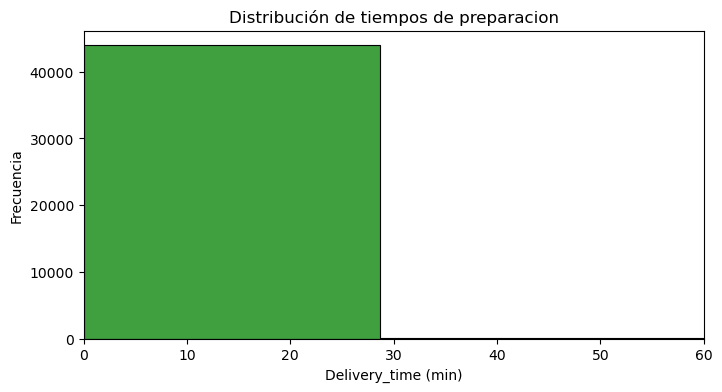

In [97]:
plt.figure(figsize=(8,4))
sns.histplot(data=data_train, x="Prep_time", bins=50, color="green")
plt.title("Distribución de tiempos de preparacion")
plt.xlabel("Delivery_time (min)")
plt.ylabel("Frecuencia")
plt.xlim(0, 60)

plt.show()


In [98]:
# Mantenemos solo filas con Delivery_time <= 30
data_train = data_train[data_train["Prep_time"] <= 30]

In [99]:
data_train["Prep_time"].describe()

count    43935.000000
mean         9.991241
std          4.098588
min          0.002394
25%          5.000000
50%         10.000000
75%         15.000000
max         25.002394
Name: Prep_time, dtype: float64

In [100]:
mask = (
    data_test["Time_Order_picked"].notna() &
    data_test["Time_Orderd"].notna() &
    (data_test["Time_Order_picked"] < data_test["Time_Orderd"])
)
data_test.loc[mask, "Time_Order_picked"] += pd.Timedelta(days=1)

# Calcular Prep_time en minutos
data_test["Prep_time"] = (
    data_test["Time_Order_picked"] - data_test["Time_Orderd"]
).dt.total_seconds() / 60

# Mostrar solo la hora (sin fecha) para visualización
data_test["Time_Orderd"] = data_test["Time_Orderd"].dt.time
data_test["Time_Order_picked"] = data_test["Time_Order_picked"].dt.time

In [101]:
data_test["Prep_time"].describe()

count    11399.000000
mean        29.406005
std        132.972043
min          3.939297
25%          5.000000
50%         10.000000
75%         15.000000
max       1438.939297
Name: Prep_time, dtype: float64

In [102]:
data_test = data_train[data_train["Prep_time"] <= 30]

In [103]:
data_test["Prep_time"].describe()

count    43935.000000
mean         9.991241
std          4.098588
min          0.002394
25%          5.000000
50%         10.000000
75%         15.000000
max         25.002394
Name: Prep_time, dtype: float64

In [104]:
# Crear columna con el día de la semana
data_train["Order_Weekday_Name"] = data_train["Order_Date"].dt.day_name()

#ver si hay más pedidos ciertos días
#Modelado predictivo el día de la semana puede influir en el tiempo de entrega ( más tráfico los lunes)
#hacer gráficos comparando volumen de pedidos o tiempos de entrega según el día.
#detectar tendencias semanales

In [105]:
data_train["Order_Weekday_Name"].unique()

array(['Saturday', 'Friday', 'Tuesday', 'Monday', 'Sunday', 'Wednesday',
       'Thursday'], dtype=object)

In [106]:
data_train["Order_Weekday_Name"].value_counts()

Order_Weekday_Name
Wednesday    6825
Friday       6779
Thursday     6125
Tuesday      6111
Saturday     6073
Sunday       6038
Monday       5984
Name: count, dtype: int64

In [107]:
data_test["Order_Weekday_Name"] = data_test["Order_Date"].dt.day_name()

In [108]:
#Columna para ver si es fin de semana
# Crear columna Is_Weekend con Sí/No
data_train["Is_Weekend"] = (
    data_train["Order_Date"].dt.weekday >= 5).replace({
        True: "Sí",
        False: "No"
    })
#comparar pedidos entre semana vs fin de semana
#Modelado predictivo el fin de semana puede influir en tiempos de entrega
#gráficos por fin de semana vs días laborales
#entender si se necesitan más repartidores en fines de semana.

In [109]:
data_train["Is_Weekend"].head(3)

0    Sí
1    No
2    Sí
Name: Is_Weekend, dtype: object

In [110]:
data_test["Is_Weekend"] = (
    data_test["Order_Date"].dt.weekday >= 5).replace({
        True: "Sí",
        False: "No"
    })

In [111]:
# La función Haversine es una fórmula matemática que permite calcular la distancia más corta 
# entre dos puntos sobre la superficie de una esfera (como la Tierra), a partir de sus coordenadas
# de latitud y longitud.

In [112]:
from math import radians, sin, cos, sqrt, atan2

def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # radio de la Tierra en km
    dlat = radians(lat2 - lat1)
    dlon = radians(lon2 - lon1)
    a = sin(dlat/2)**2 + cos(radians(lat1)) * cos(radians(lat2)) * sin(dlon/2)**2
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    return R * c

data_train["Distance_km"] = data_train.apply(
    lambda row: haversine(row["Restaurant_latitude"], row["Restaurant_longitude"],
                          row["Delivery_location_latitude"], row["Delivery_location_longitude"]),
    axis=1
)

In [113]:
data_train["Distance_km"].head(3)

0     3.025149
1    20.183530
2     1.552758
Name: Distance_km, dtype: float64

In [114]:
data_test["Distance_km"] = data_test.apply(
    lambda row: haversine(row["Restaurant_latitude"], row["Restaurant_longitude"],
                          row["Delivery_location_latitude"], row["Delivery_location_longitude"]),
    axis=1
)

In [115]:
# Columna de tiempo total
data_train["Total_time"] = data_train["Prep_time"] + data_train["Time_taken(min)"]

In [116]:
data_test["Total_time"] = data_test["Prep_time"] + data_train["Time_taken(min)"]

In [117]:
data_train["Total_time"].mean()

36.28608568914837

In [118]:
# Columna a tiempo
data_train["On_Time"] = np.where(
    data_train["Total_time"] <= 50, "Puntual", "Retraso")

# Permite medir el porcentaje de pedidos puntuales vs retrasados.
# análisis de calidad del servicio

In [119]:
data_test["On_Time"] = np.where(
    data_test["Total_time"] <= 50, "Puntual", "Retraso")

In [120]:
# # marcar distancias
# bins = [0, 2, 5, 10]
# labels = ["Corta", "Media", "Larga"]
# data_train["Distance_category"] = pd.cut(
#     data_train["Distance_km"], 
#     bins=bins, 
#     labels=labels
# )

In [121]:
data_train.isnull().sum()[data_train.isnull().sum() > 0]

Series([], dtype: int64)

In [122]:
# Crear bins que incluyan todo hasta el máximo valor
max_distance = data_train["Distance_km"].max()

bins = [0, 2, 5, max_distance]
labels = ["Corta", "Media", "Larga"]

data_train["Distance_category"] = pd.cut(
    data_train["Distance_km"],
    bins=bins,
    labels=labels,
    include_lowest=True
)

In [123]:
max_distance = data_train["Distance_km"].max()
print("Máxima distancia:", max_distance)

Máxima distancia: 19070.40810956764


In [124]:
data_train.loc[data_train["Distance_km"] > 100]

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,City,Time_taken(min),Order_Hour,Prep_time,Order_Weekday_Name,Is_Weekend,Distance_km,Total_time,On_Time,Distance_category
92,0xc042,AGRRES010DEL01,34,4.7,-27.163303,78.057044,27.233303,78.127044,2022-02-16,23:00:00,...,Metropolitan,15,23,5.0,Wednesday,No,6048.631240,20.0,Puntual,Larga
283,0xc044,AGRRES12DEL03,32,4.7,-27.165108,78.015053,27.225108,78.075053,2022-02-13,20:55:00,...,Metropolitan,31,20,15.0,Sunday,Sí,6047.919478,46.0,Puntual,Larga
1091,0xc086,GOARES010DEL03,20,4.7,-15.546594,73.760431,15.606594,73.820431,2022-02-13,20:00:00,...,Metropolitan,29,20,10.0,Sunday,Sí,3464.082720,39.0,Puntual,Larga
1783,0xc067,BHPRES13DEL02,39,4.5,-23.230791,77.437020,23.250791,77.457020,2022-02-13,09:15:00,...,Metropolitan,29,9,5.0,Sunday,Sí,5168.516553,34.0,Puntual,Larga
1976,0xc061,KOLRES16DEL01,25,4.0,-22.539129,88.365507,22.549129,88.375507,2022-02-15,09:25:00,...,Metropolitan,19,9,5.0,Tuesday,No,5013.585658,24.0,Puntual,Larga
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43860,0xc0b9,GOARES16DEL01,32,4.6,-15.498603,73.826911,15.568603,73.896911,2022-02-18,23:10:00,...,Metropolitan,24,23,5.0,Friday,No,3454.524245,29.0,Puntual,Larga
44051,0xc06d,GOARES14DEL03,22,5.0,-15.157944,73.950889,15.217944,74.010889,2022-02-17,18:50:00,...,Metropolitan,27,18,5.0,Thursday,No,3377.651072,32.0,Puntual,Larga
44640,0xc094,KOCRES06DEL03,23,4.8,-9.982834,76.283268,10.072834,76.373268,2022-02-14,19:20:00,...,Metropolitan,21,19,15.0,Monday,No,2230.110757,36.0,Puntual,Larga
44933,0xc0c2,AURGRES03DEL03,30,4.9,-19.874733,75.353942,19.904733,75.383942,2022-02-15,22:20:00,...,Metropolitan,15,22,15.0,Tuesday,No,4423.276011,30.0,Puntual,Larga


In [125]:
#Filtrar solo las filas con distancia menor o igual a 100 km
data_train = data_train[data_train["Distance_km"] <= 100]

In [126]:
#data_train[["Total_time","Distance_category", "On_Time", "Road_traffic_density", "Type_of_vehicle", "Delivery_person_Age"]].head(5)

In [127]:
data_train.isnull().sum()

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Order_Date                     0
Time_Orderd                    0
Time_Order_picked              0
Weatherconditions              0
Road_traffic_density           0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
multiple_deliveries            0
Festival                       0
City                           0
Time_taken(min)                0
Order_Hour                     0
Prep_time                      0
Order_Weekday_Name             0
Is_Weekend                     0
Distance_km                    0
Total_time                     0
On_Time                        0
Distance_category              0
dtype: int64

In [128]:
max_distance = data_train["Distance_km"].max()
print("Máxima distancia:", max_distance)

Máxima distancia: 20.969489380087087


In [129]:
max_distance = data_test["Distance_km"].max()

bins = [0, 2, 5, max_distance]
labels = ["Corta", "Media", "Larga"]

data_test["Distance_category"] = pd.cut(
    data_test["Distance_km"],
    bins=bins,
    labels=labels,
    include_lowest=True
)

In [130]:
data_test = data_test[data_test["Distance_km"] <= 100]

In [131]:
data_test.head(3)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,City,Time_taken(min),Order_Hour,Prep_time,Order_Weekday_Name,Is_Weekend,Distance_km,Total_time,On_Time,Distance_category
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,...,Urban,24,11,15.0,Saturday,Sí,3.025149,39.0,Puntual,Media
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,...,Metropolitan,33,19,5.0,Friday,No,20.183530,38.0,Puntual,Larga
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,...,Urban,26,8,15.0,Saturday,Sí,1.552758,41.0,Puntual,Corta


In [132]:
print(list(data_train.columns))

['ID', 'Delivery_person_ID', 'Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_latitude', 'Restaurant_longitude', 'Delivery_location_latitude', 'Delivery_location_longitude', 'Order_Date', 'Time_Orderd', 'Time_Order_picked', 'Weatherconditions', 'Road_traffic_density', 'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle', 'multiple_deliveries', 'Festival', 'City', 'Time_taken(min)', 'Order_Hour', 'Prep_time', 'Order_Weekday_Name', 'Is_Weekend', 'Distance_km', 'Total_time', 'On_Time', 'Distance_category']


### Análisis Exploratorio (EDA)

#### Distribución y detección de valores atípicos analisando variables numericas y categóricas

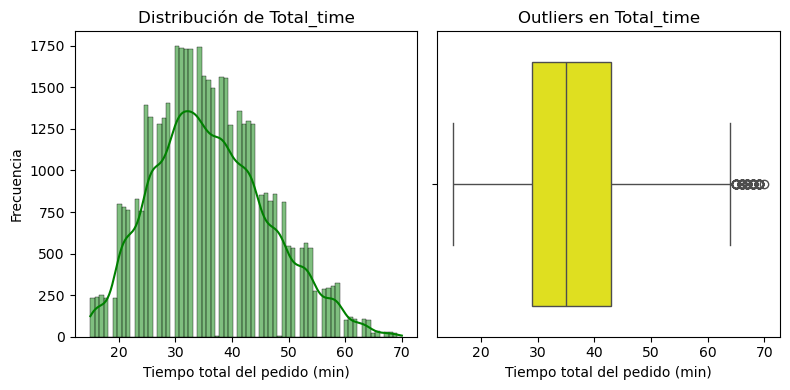

In [133]:
fig, axes = plt.subplots(1, 2, figsize=(8,4))

sns.histplot(data_train["Total_time"], kde=True, ax=axes[0], color="green")
axes[0].set_title("Distribución de Total_time")
axes[0].set_xlabel("Tiempo total del pedido (min)")
axes[0].set_ylabel("Frecuencia")

sns.boxplot(x=data_train["Total_time"], ax=axes[1], color="yellow")
axes[1].set_title("Outliers en Total_time")
axes[1].set_xlabel("Tiempo total del pedido (min)")

plt.tight_layout()
plt.show()

In [134]:
# Observaciones:
# La forma es aproximadamente normal, con un pico entre 30 y 40 minutos
# La mayoría de las entregas se concentran en ese rango, lo que sugiere que es el tiempo típico
# La curva ayuda a visualizar la tendencia general: simétrica, sin sesgo extremo
# El sistema de entregas parece tener un comportamiento estable
# Los puntos fuera son outliers entregas que tardaron mucho más de lo normal entre 60–70 min
# Hay entregas que se salen del patrón esperado

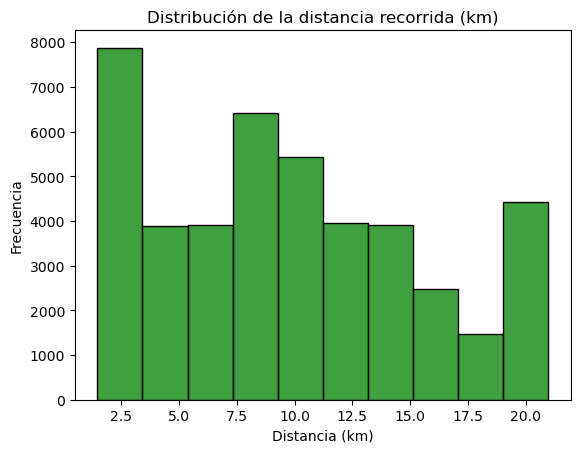

In [135]:
sns.histplot(data=data_train, x="Distance_km", bins=10, color="green")
plt.title("Distribución de la distancia recorrida (km)")
plt.xlabel("Distancia (km)")
plt.ylabel("Frecuencia")
plt.show()

In [136]:
#Observaciones:
# La mayoría de las entregas se hacen en distancias muy cortas 2.5–5 km
# A medida que aumenta la distancia, la frecuencia cae drásticamente
# Las entregas de más de 10 km son mucho menos comunes
# Si la mayoría de entregas son cortas los retrasos en esas distancias podrían indicar problemas
#operativos no de tráfico

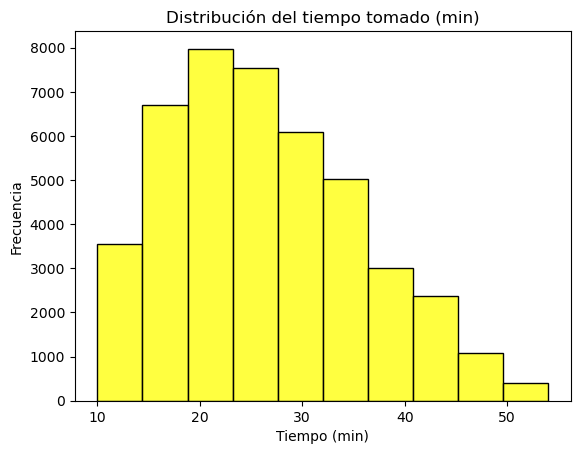

In [137]:
sns.histplot(data=data_train, x="Time_taken(min)", bins=10, color="yellow")
plt.title("Distribución del tiempo tomado (min)")
plt.xlabel("Tiempo (min)")
plt.ylabel("Frecuencia")
plt.show()

In [138]:
#Observacion:
# La mayoría de entregas se completan en menos de 30 minutos
# A medida que el tiempo aumenta, la frecuencia disminuye
# Entregas rápidas predominan podría estar relacionado con distancias cortas, 
#buen tráfico o rutas bien diseñadas
# Hay entregas que tardan más de 40 minutos, aunque son menos frecuentes


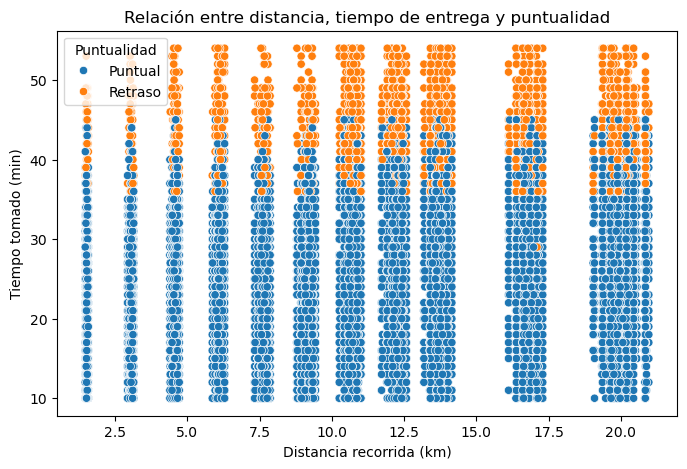

In [139]:
plt.figure(figsize=(8, 5))

sns.scatterplot(data=data_train, 
                x="Distance_km", 
                y="Time_taken(min)", 
                hue="On_Time")

plt.title("Relación entre distancia, tiempo de entrega y puntualidad")
plt.xlabel("Distancia recorrida (km)")
plt.ylabel("Tiempo tomado (min)")
plt.legend(title="Puntualidad")

In [140]:
#Observaciones:
# Entregas cortas 2.5–5 km
#Todas fueron puntuales y rápidas 15–22 min
#Esto confirma que las entregas urbanas cortas son más eficientes
# Entregas largas 7–20 km
#Todas fueron con retraso, y el tiempo aumenta casi linealmente con la distancia
#Esto sugiere que la distancia es un factor crítico en la puntualidad
# Transición clara en los 7 km
#A partir de esa distancia, las entregas dejan de ser puntuales.
#Podría usarse como umbral para ajustar rutas o tiempos estimados

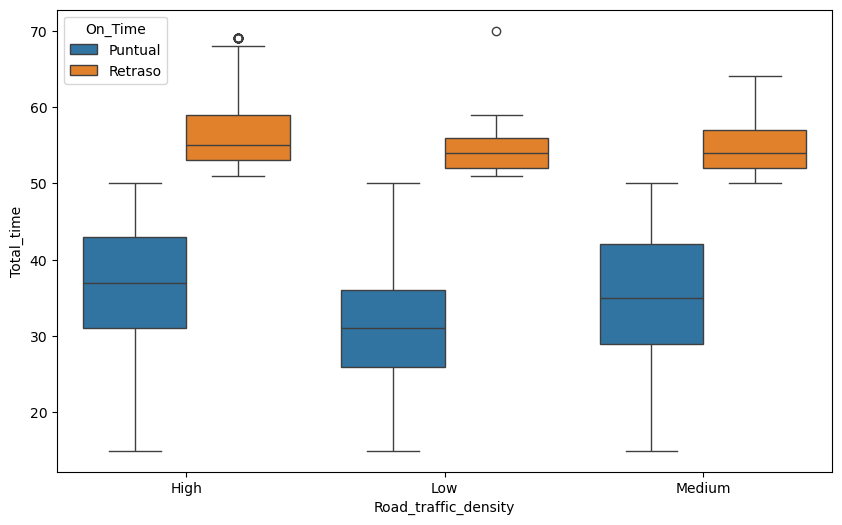

In [141]:
plt.figure(figsize=(10, 6)) 
sns.boxplot(data=data_train, x="Road_traffic_density", y="Total_time", hue="On_Time")

plt.show()

In [142]:
# Observaciones:

# Hay entregas con tráfico "Low" con"Retraso" de mas 50 min, lo que indica que el tráfico
#no es el único factor.

# Entregas con tráfico "High" fueron puntual y más rápidas  en 40 y 50 min, lo que sugiere que
#otros factores como experiencia del repartidor o ruta optimizada pueden compensar el tráfico

#Entregas más rápidas con tráfico medio fueron "Puntual". lo que podría indicar
#que ese nivel de tráfico es más estable o predecible.


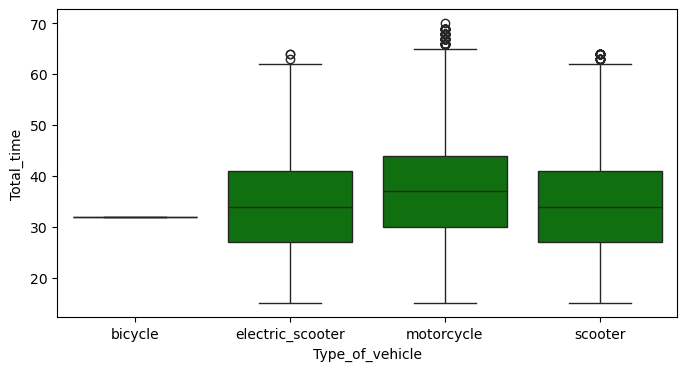

In [143]:
# Boxplot: tiempo total según tipo de vehículo
plt.figure(figsize=(8,4)) 
sns.boxplot(data=data_train, x="Type_of_vehicle", y="Total_time", color = "green")
plt.show()

In [144]:
# Observaciones:
# Scooters y motos tienen más variabilidad en tiempos, lo que sugiere que su eficiencia depende de otros factores (tráfico, experiencia, ruta).
# Bicicleta parece estable, pero con solo un dato no se puede generalizar.
# Los outliers indican entregas que tardaron mucho más de lo normal, posiblemente por tráfico, errores, clima o zonas difíciles.


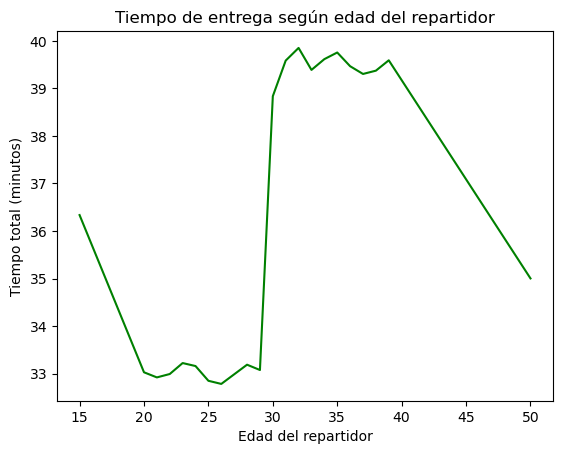

In [145]:
# tiempo total de entrega según la edad del repartidor
data_sorted = data_train.sort_values("Delivery_person_Age")

sns.lineplot(data=data_sorted, x="Delivery_person_Age", y="Total_time", color="green", errorbar=None)
plt.title("Tiempo de entrega según edad del repartidor")
plt.xlabel("Edad del repartidor")
plt.ylabel("Tiempo total (minutos)")
plt.show()


In [146]:
# - Edad joven (15–20 años)
# El tiempo de entrega disminuye rápidamente.
# Posible efecto de aprendizaje o adaptación inicial.
# - Edad media (20–30 años)
# El tiempo se mantiene estable y bajo.
# Este grupo parece ser el más eficiente.
# - Edad intermedia (35–40 años)
# Hay un pico de tiempo: entregas más lentas.
# Podría deberse a fatiga, menor agilidad, o condiciones externas.
# - Edad avanzada (45–50 años)
# El tiempo vuelve a bajar, lo que sugiere experiencia compensa la edad.


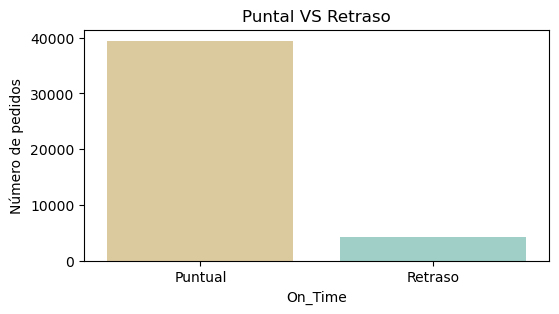

In [147]:
# Puntal VS Retraso
plt.figure(figsize=(6,3))
sns.countplot(data=data_train, x="On_Time", hue="On_Time", palette="BrBG", legend=False)

plt.title("Puntal VS Retraso")
plt.xlabel("On_Time")
plt.ylabel("Número de pedidos")
plt.show()

In [148]:
#Observaciones:

# Dominio de entregas puntuales
# Esto sugiere que el sistema logístico es altamente eficiente en general

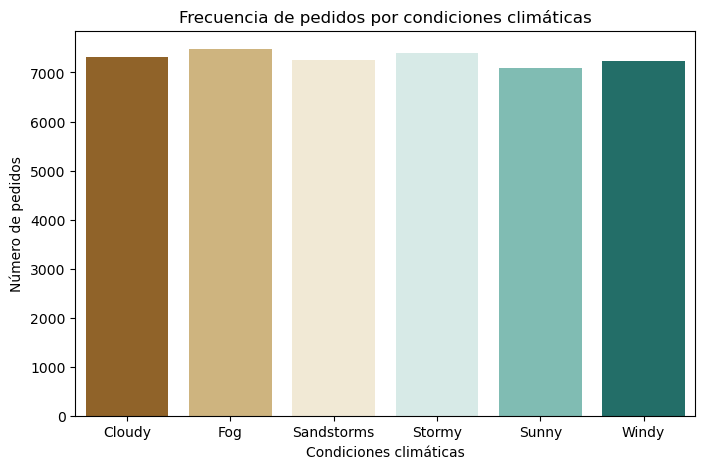

In [149]:
# Cuantos pedidos se hicieron en cada categoría de clima
plt.figure(figsize=(8,5))
sns.countplot(data=data_train, x="Weatherconditions", hue="Weatherconditions", palette="BrBG", legend=False)

plt.title("Frecuencia de pedidos por condiciones climáticas")
plt.xlabel("Condiciones climáticas")
plt.ylabel("Número de pedidos")
plt.show()

In [150]:
#Observaciones:
# Tienen frecuencias similares
# Esto indica que el clima no parece afectar significativamente el volumen de pedidos
# Sandstorms y Fog podrían ser condiciones menos frecuentes en la vida real pero aquí aparecen con la misma frecuencia que las demás
# El clima podría no ser un factor determinante


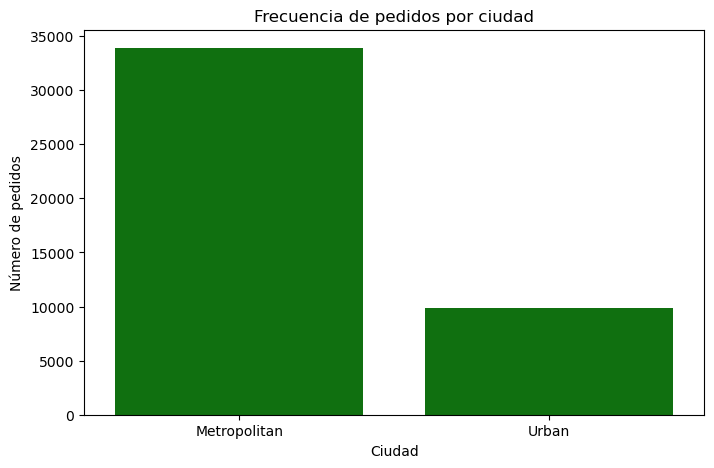

In [151]:
#Cuántos pedidos se hicieron en cada ciudad

plt.figure(figsize=(8,5))
sns.countplot(x="City", data=data_train, color = "green")

plt.title("Frecuencia de pedidos por ciudad")
plt.xlabel("Ciudad")
plt.ylabel("Número de pedidos")
plt.show()


In [152]:
#Observaciones:

# Desbalance claro entre ciudades está fuertemente concentrado en zonas metropolitanas
# Al comparar tiempos de entrega entre ciudades,tener en cuenta que Urban tiene menos representatividad
# Riesgo de sesgo

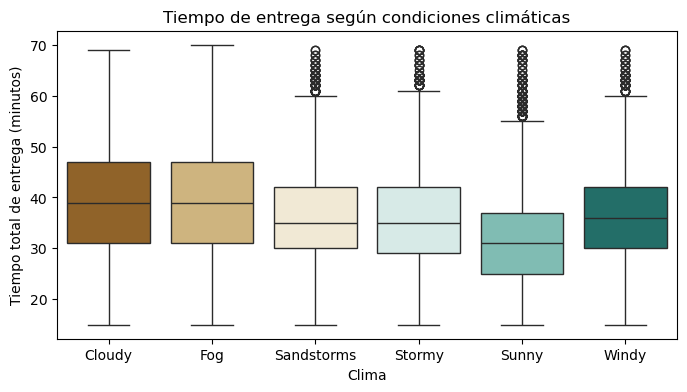

In [153]:
# Boxplot por clima
plt.figure(figsize=(8,4))
sns.boxplot(x="Weatherconditions", y="Total_time", hue="Weatherconditions",
            data=data_train, palette="BrBG", legend=False)

plt.title("Tiempo de entrega según condiciones climáticas")
plt.xlabel("Clima")
plt.ylabel("Tiempo total de entrega (minutos)")
plt.show()

In [154]:
#Observaciones:
#Sunny y Cloudy tiempos más bajos y cajas compactas, entregas rápidas y consistentes
#Fog y Windy mediana más alta y mayor dispersión, entregas más lentas
#Stormy y Sandstorms: presencia de outliers extremos, condiciones críticas que provocan retrasos severos


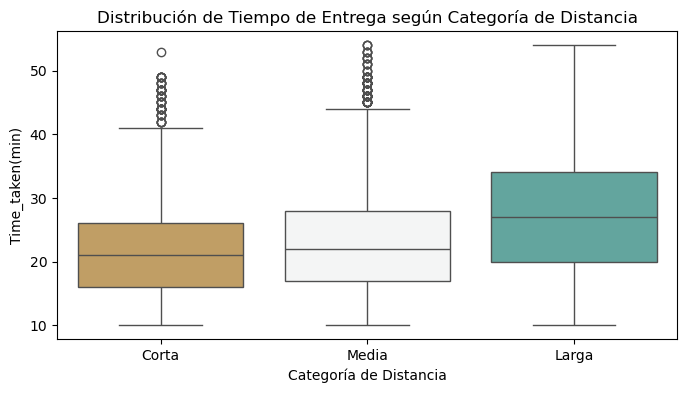

In [155]:
#Según la categoría de distancia

plt.figure(figsize=(8, 4))
sns.boxplot(
    x="Distance_category",
    y="Time_taken(min)",
    data=data_train,
    hue="Distance_category",
    palette="BrBG", 
    legend=False
)
plt.title("Distribución de Tiempo de Entrega según Categoría de Distancia")
plt.xlabel("Categoría de Distancia")
plt.ylabel("Time_taken(min)")
plt.show()

In [156]:
# Observciones:
#  Las entregas cortas deberían ser rápidas, pero los outliers indican ineficiencias puntuales
#  Las entregas largas son predecibles pero lentas, lo que puede facilitar planificación
#  La categoría media es la más variable, lo que podría requerir ajustes en estimaciones de tiempo


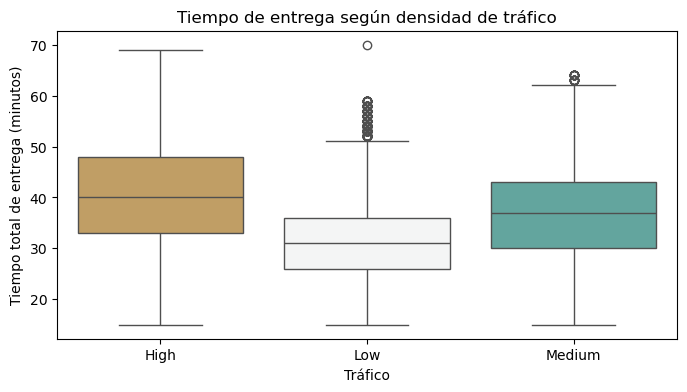

In [157]:
# Boxplot por tráfico
plt.figure(figsize=(8,4))
sns.boxplot(x="Road_traffic_density", y="Total_time", hue="Road_traffic_density",
            data=data_train, palette="BrBG", legend=False)
plt.title("Tiempo de entrega según densidad de tráfico")
plt.xlabel("Tráfico")
plt.ylabel("Tiempo total de entrega (minutos)")
plt.show()

In [158]:
#Observaciones:
# Low tiempos bajos y estables entregas eficientes
# Medium ligera subida en la mediana pero aún controlable
# High cajas más altas, mayor dispersión y outliers, congestión que provoca retrasos

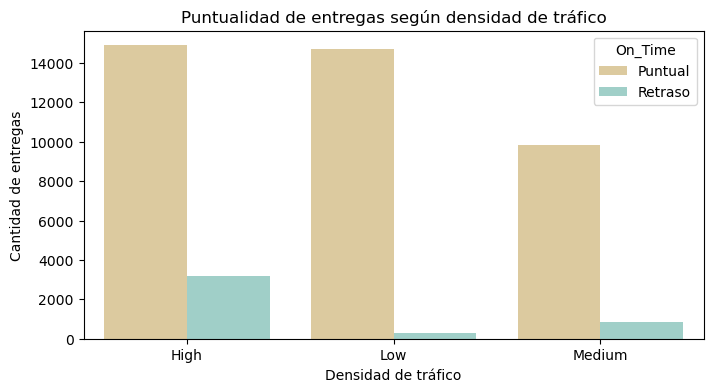

In [159]:
# Puntualidad según el tráfico

plt.figure(figsize=(8, 4))
sns.countplot(
    x="Road_traffic_density",
    hue="On_Time",
    data=data_train,
    palette="BrBG"
)

plt.title("Puntualidad de entregas según densidad de tráfico")
plt.xlabel("Densidad de tráfico")
plt.ylabel("Cantidad de entregas")
plt.legend(title="On_Time")
plt.show()

In [160]:
# Observaciones:
#  El tráfico no es el único factor que determina la puntualidad
#  El sistema parece estar bien adaptado al tráfico alto, pero menos eficiente en tráfico medio
#lo cual es contraintuitivo.

#  Podría haber una oportunidad de mejora en zonas de tráfico medio, donde la variabilidad es mayor


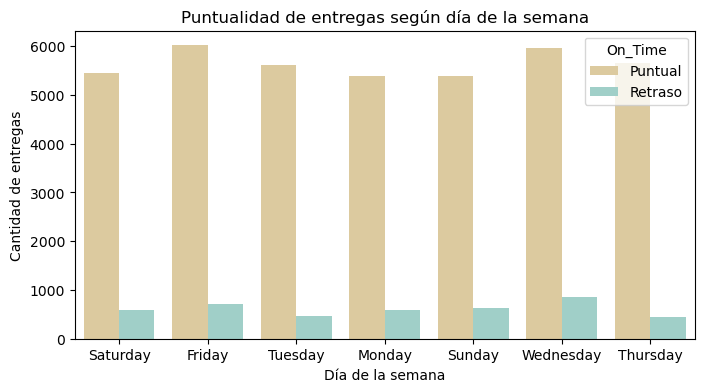

In [161]:
# Puntualidad según el día de la semana

plt.figure(figsize=(8, 4))
sns.countplot(
    x="Order_Weekday_Name",
    hue="On_Time",
    data=data_train,
    palette="BrBG"
)
plt.title("Puntualidad de entregas según día de la semana")
plt.xlabel("Día de la semana")
plt.ylabel("Cantidad de entregas")
plt.legend(title="On_Time")
plt.show()

In [162]:
# Observaciones:

# Fin de semana = alta demanda + buen rendimiento, pero también más presión logística.
# Días laborales medios son estables, ideales para pruebas o ajustes.

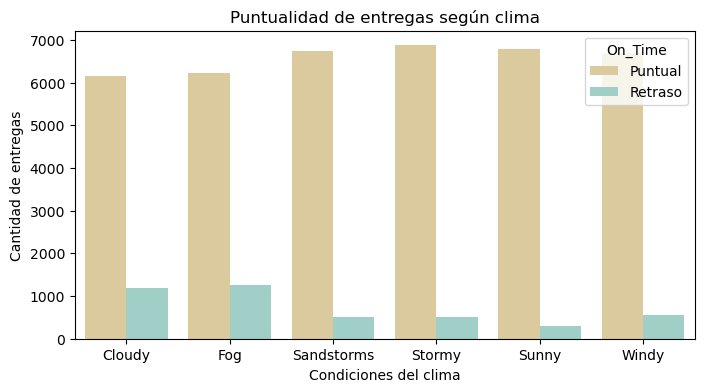

In [163]:
# Puntualidad según clima

plt.figure(figsize=(8, 4))
sns.countplot(
    x="Weatherconditions",
    hue="On_Time",
    data=data_train,
    palette="BrBG"
)

plt.title("Puntualidad de entregas según clima")
plt.xlabel("Condiciones del clima")
plt.ylabel("Cantidad de entregas")
plt.legend(title="On_Time")
plt.show()

In [164]:
# Observaciones:

#  El sistema logístico es robusto frente al clima, especialmente en condiciones extremas
#  Los retrasos no parecen estar directamente correlacionados con el clima, sino posiblemente
# con otros factores como tráfico o tipo de vehículo
#  "Cloudy" y "Fog" podrían requerir revisión de rutas o protocolos de seguridad

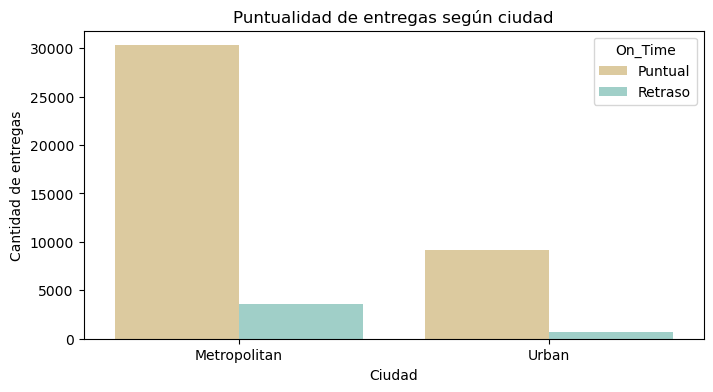

In [165]:
# Puntualidad según ciudad

plt.figure(figsize=(8, 4))
sns.countplot(
    x="City",
    hue="On_Time",
    data=data_train,
    palette="BrBG"
)

plt.title("Puntualidad de entregas según ciudad")
plt.xlabel("Ciudad")
plt.ylabel("Cantidad de entregas")
plt.legend(title="On_Time")
plt.show()

In [166]:
# Observaciones:

#  Las ciudades metropolitanas manejan alta demanda con buena eficiencia
#aunque con más presión logística.
# Las ciudades urbanas tienen menos entregas pero mayor estabilidad.
# El sistema parece escalar bien en entornos grandes, pero podría optimizarse
#aún más para reducir los retrasos en zonas densas.

#### Evaluación de categorías poco frecuentes o redundantes

In [167]:
data_train["Weatherconditions"].value_counts()

Weatherconditions
Fog           7478
Stormy        7390
Cloudy        7324
Sandstorms    7263
Windy         7231
Sunny         7086
Name: count, dtype: int64

In [168]:
# Todas las categorías tienen entre 7000 y 7500 registros lo que indica un balance artificial
# No hay categorías raras, pero sí redundancia semántica
# Stormy y Sandstorms podrían agruparse como clima severo
# Cloudy, Fog, Windy  podrían formar un grupo de clima moderado

In [169]:
data_train["Weatherconditions"] = data_train["Weatherconditions"].map({
    "Stormy": "Severe",
    "Sandstorms": "Severe",
    "Cloudy": "Moderate",
    "Fog": "Moderate",
    "Windy": "Moderate",
    "Sunny": "Sunny"
}
)

print(data_train["Weatherconditions"].value_counts())

Weatherconditions
Moderate    22033
Severe      14653
Sunny        7086
Name: count, dtype: int64


In [170]:
data_train["City"].value_counts()

City
Metropolitan    33884
Urban            9888
Name: count, dtype: int64

In [171]:
#Desbalance fuerte más del 75% de los datos vienen de zonas metropolitanas

In [172]:
data_train["Festival"].value_counts()

Festival
No     42912
Yes      860
Name: count, dtype: int64

In [173]:
# Yes: solo 860 registros frente a 42,912 de No categoría muy poco frecuente riesgo de 
#sobreajuste si se usa como predictor

In [174]:
data_train["Type_of_vehicle"].value_counts()

Type_of_vehicle
motorcycle          25569
scooter             14670
electric_scooter     3532
bicycle                 1
Name: count, dtype: int64

In [175]:
# bicycle: solo 1 registro claramente un outlier
# electric_scooter 3,532  muy insignificativo antes 14670 scooter 
# Eliminamos la categoría irrelevante bicycle y simplificamos scooters en un solo grupo lo que hace la variable 
#más robusta


In [176]:
# Eliminar registros con bicycle
data_train = data_train[data_train["Type_of_vehicle"] != "bicycle"]

# Agrupar scooter y electric_scooter
data_train["Type_of_vehicle"] = data_train["Type_of_vehicle"].astype("object")

data_train["Type_of_vehicle"] = data_train["Type_of_vehicle"].replace({
    "scooter": "scooter",
    "electric_scooter": "scooter",
    "motorcycle": "motorcycle"
})

In [177]:
data_train["Type_of_vehicle"] = data_train["Type_of_vehicle"].astype("category")
print(data_train["Type_of_vehicle"].value_counts())

Type_of_vehicle
motorcycle    25569
scooter       18202
Name: count, dtype: int64


In [178]:
data_train.Type_of_vehicle.unique()

['motorcycle', 'scooter']
Categories (2, object): ['motorcycle', 'scooter']

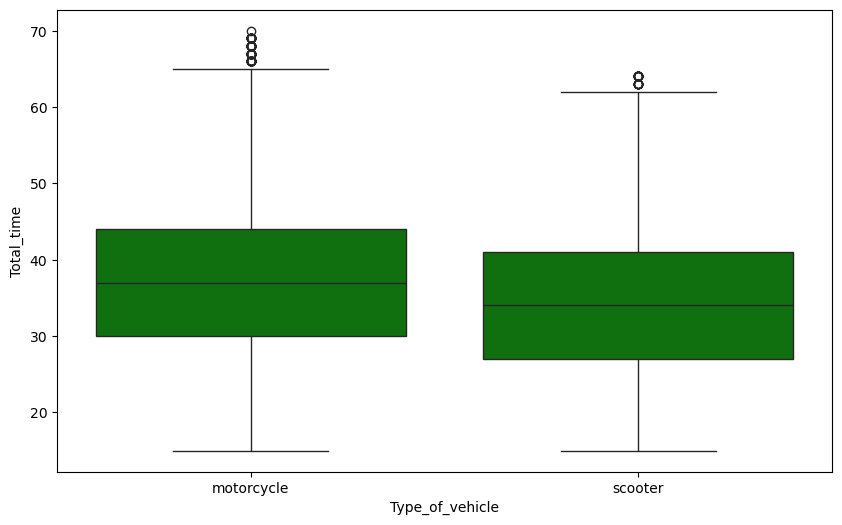

In [179]:
plt.figure(figsize=(10, 6)) 
sns.boxplot(data=data_train, x="Type_of_vehicle", y="Total_time", color = "green")
plt.show()

In [180]:
data_train["Road_traffic_density"].value_counts()

Road_traffic_density
High      18058
Low       15020
Medium    10693
Name: count, dtype: int64

In [181]:
# Todas las categorías tienen buena frecuencia, no hay rareza ni redundancia

In [182]:
data_train["Type_of_order"].value_counts()

Type_of_order
Snack     11079
Meal      10987
Drinks    10878
Buffet    10827
Name: count, dtype: int64

In [183]:
# Todas las categorías están bien representadas, no hay necesidad de agrupar
# ni eliminar

In [184]:
data_train["multiple_deliveries"].value_counts()

multiple_deliveries
1    27949
0    13562
2     1918
3      342
Name: count, dtype: int64

In [185]:
# 3 = 342 registros categoría poco frecuente
# Podriamos agrupar 2 y 3 como "multiple" si tienen comportamiento similar.
# O convertir en binario: "single" vs "multiple".

In [186]:
# Agrupar en binario: single vs multiple
data_train["multiple_deliveries"] = data_train["multiple_deliveries"].astype("int")

data_train["multiple_deliveries"] = data_train["multiple_deliveries"].apply(
    lambda x: "single" if x == 0 else "multiple"
)

print(data_train["multiple_deliveries"].value_counts())

multiple_deliveries
multiple    30209
single      13562
Name: count, dtype: int64


### Patrones temporales

In [187]:
data_train["Order_Weekday_Name"].value_counts()

Order_Weekday_Name
Wednesday    6813
Friday       6738
Thursday     6105
Tuesday      6083
Saturday     6051
Sunday       6011
Monday       5970
Name: count, dtype: int64

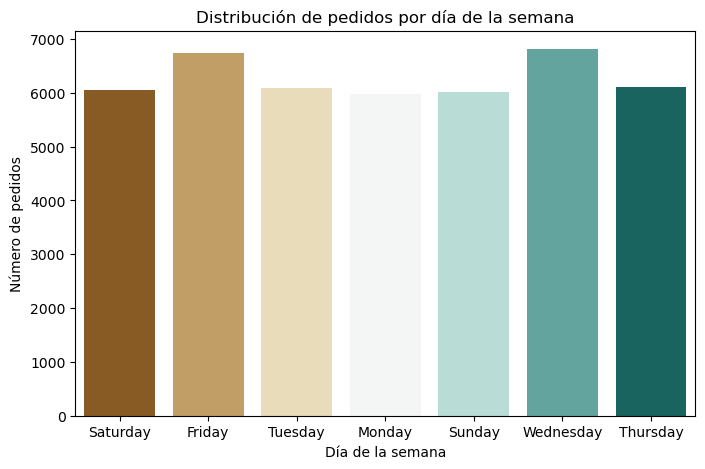

In [188]:
plt.figure(figsize=(8,5))
sns.countplot(data=data_train,
              x="Order_Weekday_Name",  
              hue="Order_Weekday_Name", palette="BrBG", legend=False)

plt.title("Distribución de pedidos por día de la semana")
plt.xlabel("Día de la semana")
plt.ylabel("Número de pedidos")
plt.show()


In [189]:
#Observaciones:
# Hay un patrón claro de alta demanda miércoles-viernes
# Lunes es el punto más bajo.
#    Miércoles y viernes son los días con más pedidos
#Esto podría reflejar mayor actividad laboral (pedidos en oficinas) y preparación 
#para el fin de semana (viernes)
#   Lunes con menor volumen
#Posibles causas como menor disposición a consumir tras el fin de semana, rutinas más 
#estrictas al inicio de semana

#   Posibles mejoras:
# Capacidad de reparto según el día.
# Promociones para días con baja demanda (lunes)

# Esto puede guiar decisiones de negocio, logística y marketing

In [190]:
data_train["Is_Weekend"].value_counts()

Is_Weekend
No    31709
Sí    12062
Name: count, dtype: int64

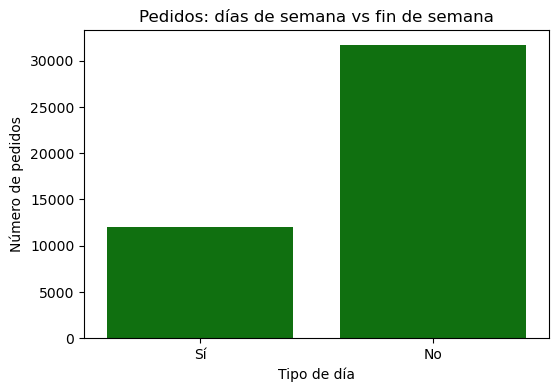

In [191]:
plt.figure(figsize=(6,4))
sns.countplot(data=data_train,
              x="Is_Weekend", color = "green")

plt.title("Pedidos: días de semana vs fin de semana")
plt.xlabel("Tipo de día")
plt.ylabel("Número de pedidos")
plt.show()

In [192]:
#Observaciones:
# Volumen claramente mayor en días de semana
# 31,709 pedidos en días laborales 
# Solo 12,062 pedidos en fines de semana 
#Lo que indica un patrón fuerte de consumo en días laborales
#La demanda está concentrada de lunes a viernes, lo que sugiere:
# Mayor actividad en entornos laborales o rutinas diarias
# Posible menor disponibilidad de repartidores los fines de semana
# Oportunidad de reforzar la logística entre semana

#   Posibles mejoras:
# Lanzar promociones específicas para sábado y domingo

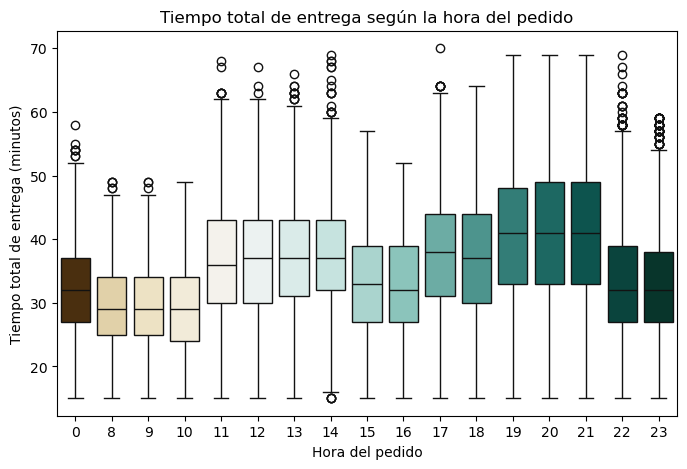

In [193]:
#Comparación de tiempos de entrega y puntualidad según franjas horarias
plt.figure(figsize=(8,5))
sns.boxplot(
    data=data_train,
    x="Order_Hour",
    y="Total_time",
    hue="Order_Hour", 
    palette="BrBG",
    legend=False      
)


plt.title("Tiempo total de entrega según la hora del pedido")
plt.xlabel("Hora del pedido")
plt.ylabel("Tiempo total de entrega (minutos)")
plt.show()

In [194]:
# Observaciones:
#Horas con mayor dispersión
#  Las franjas de 11:00 a 14:00 y 18:00 a 21:00 muestran cajas más altas y más outliers:
#  Esto indica mayor variabilidad en los tiempos de entrega
#  Picos de demanda (almuerzo y cena).
#  Posible congestión de tráfico o saturación de repartidores
#Horas con entregas más rápidas y estables
#  Las horas tempranas (0:00–6:00) y media tarde (15:00–17:00) tienen cajas más compactas
#  y medianas más bajas esto sugiere:
#  Menor volumen de pedidos
#  Entregas más eficientes por menor tráfico

# Los picos de carga se concentran entre las 11:00 y las 14:00, mientras que los mayores 
# retrasos ocurren entre las 18:00 y las 21:00. 
# Estas franjas horarias representan momentos críticos para la operación logística

#Outliers frecuentes
#   En casi todas las horas hay puntos fuera del rango típico esto puede deberse a:
#   Retrasos por clima, tráfico, o errores operativos.
#   Pedidos con rutas más largas o múltiples entregas.

#Posibles soluciones:
# Reforzar personal y rutas entre las 18h y 21h para reducir retrasos
# Ajustar tiempos estimados en la app para reflejar la realidad en horas críticas.
# Optimizar asignación de repartidores en franjas de alta demanda

### Análisis geográfico

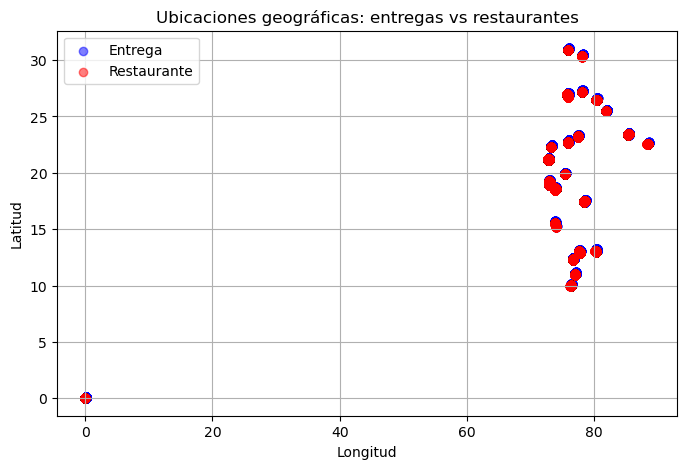

In [195]:
plt.figure(figsize=(8,5))

# Ubicaciones de entrega
plt.scatter(data_train["Delivery_location_longitude"],
            data_train["Delivery_location_latitude"],
            c="blue", label="Entrega", alpha=0.5)

# Ubicaciones de restaurantes
plt.scatter(data_train["Restaurant_longitude"],
            data_train["Restaurant_latitude"],
            c="red", label="Restaurante", alpha=0.5)

plt.title("Ubicaciones geográficas: entregas vs restaurantes")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.legend()
plt.grid(True)
plt.show()

In [196]:
# Hay al menos un par de puntos en la coordenada (0,0), lo que probablemente indica datos faltantes o 
# mal registrados, conviene filtrar o corregir esos registros para evitar distorsiones en el análisis

In [197]:
# Filtrar coordenadas válidas
data_geo = data_train[
    (data_train["Delivery_location_longitude"] != 0) &
    (data_train["Delivery_location_latitude"] != 0) &
    (data_train["Restaurant_longitude"] != 0) &
    (data_train["Restaurant_latitude"] != 0)
]

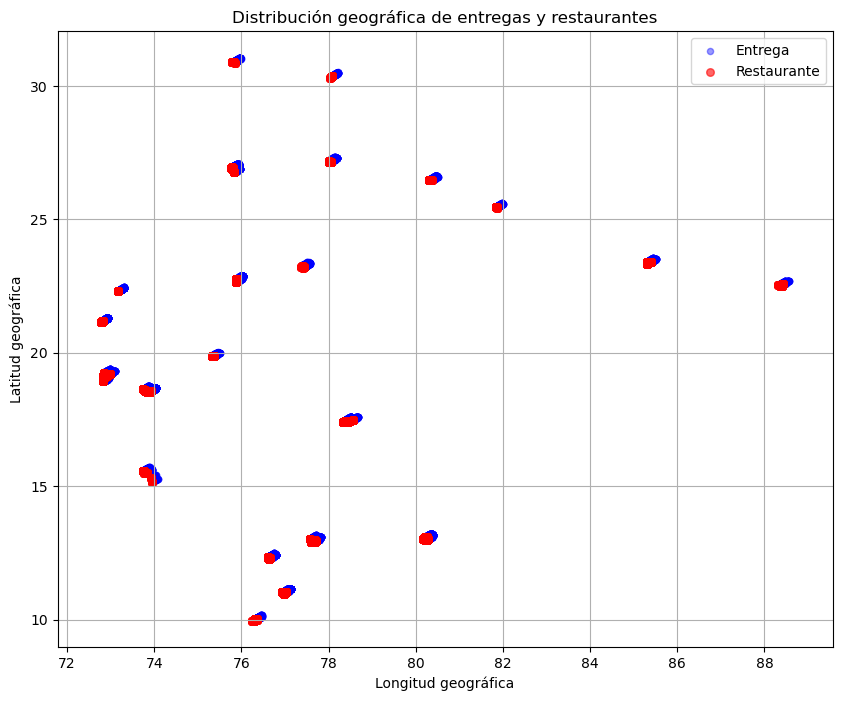

In [198]:
plt.figure(figsize=(10,8))

plt.scatter(data_geo["Delivery_location_longitude"],
            data_geo["Delivery_location_latitude"],
            c="blue", label="Entrega", alpha=0.4, s=20)

plt.scatter(data_geo["Restaurant_longitude"],
            data_geo["Restaurant_latitude"],
            c="red", label="Restaurante", alpha=0.6, s=30)
plt.grid(True)
plt.xlim(data_geo["Delivery_location_longitude"].min()-1,
         data_geo["Delivery_location_longitude"].max()+1)

plt.ylim(data_geo["Delivery_location_latitude"].min()-1,
         data_geo["Delivery_location_latitude"].max()+1)
plt.title("Distribución geográfica de entregas y restaurantes")
plt.xlabel("Longitud geográfica")
plt.ylabel("Latitud geográfica")
plt.legend()
plt.show()


In [199]:
#Observaciones:

# La mayoría de los puntos (tanto entregas como restaurantes) están agrupados entre latitudes 10–30 
#y longitudes cercanas a 80. Esto indica que la operación se concentra en una zona geográfica específica

# Los puntos azules están más extendidos que los rojos. Esto sugiere que los repartidores cubren zonas más 
#amplias que donde se ubican los locales.

# Los puntos rojos están más concentrados, lo que indica que los restaurantes están ubicados en zonas 
# comerciales o céntricas. Esto facilita la preparación, pero exige rutas eficientes para cubrir la dispersión 
# de entregas

In [200]:
# Reemplazar coordenadas inválidas por NaN en las columnas originales
data_train.loc[data_train["Delivery_location_longitude"] == 0, "Delivery_location_longitude"] = np.nan
data_train.loc[data_train["Delivery_location_latitude"] == 0, "Delivery_location_latitude"] = np.nan
data_train.loc[data_train["Restaurant_longitude"] == 0, "Restaurant_longitude"] = np.nan
data_train.loc[data_train["Restaurant_latitude"] == 0, "Restaurant_latitude"] = np.nan

In [201]:
data_train.isnull().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age               0
Delivery_person_Ratings           0
Restaurant_latitude            3515
Restaurant_longitude           3515
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                       0
Time_Order_picked                 0
Weatherconditions                 0
Road_traffic_density              0
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries               0
Festival                          0
City                              0
Time_taken(min)                   0
Order_Hour                        0
Prep_time                         0
Order_Weekday_Name                0
Is_Weekend                        0
Distance_km                       0
Total_time                        0
On_Time                           0
Distance_category           

In [202]:
data_train = data_train.dropna(subset=[
    "Delivery_location_longitude",
    "Delivery_location_latitude",
    "Restaurant_longitude",
    "Restaurant_latitude"
])

In [203]:
data_train.isnull().sum()

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Order_Date                     0
Time_Orderd                    0
Time_Order_picked              0
Weatherconditions              0
Road_traffic_density           0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
multiple_deliveries            0
Festival                       0
City                           0
Time_taken(min)                0
Order_Hour                     0
Prep_time                      0
Order_Weekday_Name             0
Is_Weekend                     0
Distance_km                    0
Total_time                     0
On_Time                        0
Distance_category              0
dtype: int64

In [204]:
# Al eliminar los puntos en (0,0), el gráfico ahora refleja solo ubicaciones válidas, 
# lo que mejora la interpretación y evita sesgos.

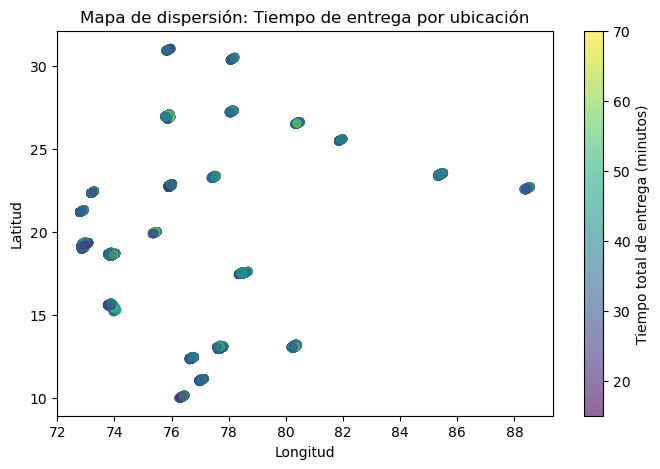

In [205]:
# Scatter plot: ubicaciones de entrega coloreadas por tiempo total
plt.figure(figsize=(8,5))
scatter = plt.scatter(
    data_train["Delivery_location_longitude"],
    data_train["Delivery_location_latitude"],
    c=data_train["Total_time"],
    cmap="viridis",
    alpha=0.6,
    s=30
)
plt.colorbar(scatter, label="Tiempo total de entrega (minutos)")
plt.title("Mapa de dispersión: Tiempo de entrega por ubicación")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.show()

In [206]:
#Observaciones:
# Cada punto representa una entrega
# El color indica el tiempo total de entrega (Total_time)
# Permite ver qué zonas geográficas concentran retrasos

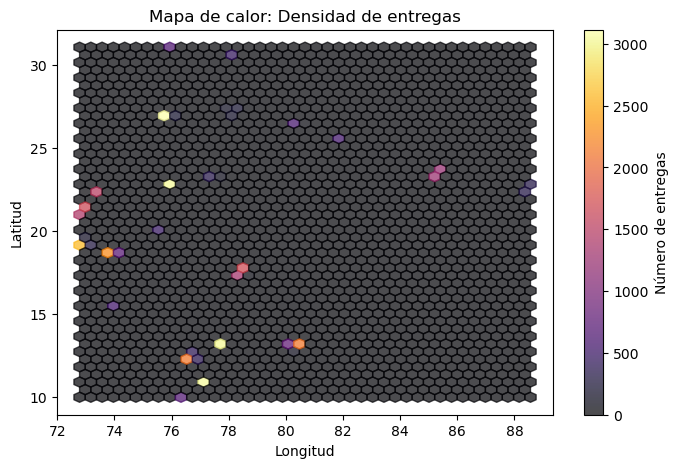

In [207]:
# Hexbin plot: densidad de entregas
plt.figure(figsize=(8,5))
hb = plt.hexbin(
    data_train["Delivery_location_longitude"],
    data_train["Delivery_location_latitude"],
    gridsize=40,
    cmap="inferno",
    alpha=0.7
)
plt.colorbar(hb, label="Número de entregas")
plt.title("Mapa de calor: Densidad de entregas")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.show()

In [208]:
#Observaciones:
# Divide el espacio en celdas hexagonales
# El color de cada celda refleja la densidad de entregas
# Permite identificar clusters de alta demanda

#Posibles soluciones:
# Zonas con alta densidad de entregas, requieren más repartidores o rutas optimizadas.
# Zonas con tiempos elevados, pueden estar afectadas por tráfico, distancia o condiciones climáticas
# Comparación entre ambos mapas, permite distinguir si los retrasos se deben a alta demanda o a factores externos.


### Correlaciones entre variables numéricas

In [209]:
num = data_train.select_dtypes(include=["int64", "int32", "float64"])
num.shape

(40256, 12)

In [210]:
num.isnull().sum()

Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Vehicle_condition              0
Time_taken(min)                0
Order_Hour                     0
Prep_time                      0
Distance_km                    0
Total_time                     0
dtype: int64

In [211]:
num.corr()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition,Time_taken(min),Order_Hour,Prep_time,Distance_km,Total_time
Delivery_person_Age,1.000000,-0.115627,0.004728,0.009286,0.004720,0.009275,-0.003764,0.302485,0.001089,-0.011031,-0.001143,0.273764
Delivery_person_Ratings,-0.115627,1.000000,-0.003679,0.002550,-0.004403,0.001414,0.047340,-0.359479,-0.062306,0.003339,-0.107911,-0.329274
Restaurant_latitude,0.004728,-0.003679,1.000000,0.000626,0.999977,0.001112,0.003017,0.012874,0.011476,-0.005518,0.018474,0.009623
Restaurant_longitude,0.009286,0.002550,0.000626,1.000000,0.000633,0.999945,0.002248,0.008714,0.000924,-0.000098,0.000518,0.007975
Delivery_location_latitude,0.004720,-0.004403,0.999977,0.000633,1.000000,0.001190,0.003075,0.015031,0.015345,-0.005511,0.025186,0.011609
Delivery_location_longitude,0.009275,0.001414,0.001112,0.999945,0.001190,1.000000,0.002340,0.012095,0.006985,-0.000091,0.011034,0.011087
Vehicle_condition,-0.003764,0.047340,0.003017,0.002248,0.003075,0.002340,1.000000,-0.242065,0.003814,0.007056,0.008732,-0.219793
Time_taken(min),0.302485,-0.359479,0.012874,0.008714,0.015031,0.012095,-0.242065,1.000000,0.185358,-0.010026,0.321455,0.915679
Order_Hour,0.001089,-0.062306,0.011476,0.000924,0.015345,0.006985,0.003814,0.185358,1.000000,0.001042,0.576859,0.170894
Prep_time,-0.011031,0.003339,-0.005518,-0.000098,-0.005511,-0.000091,0.007056,-0.010026,0.001042,1.000000,0.000793,0.392710


<Axes: >

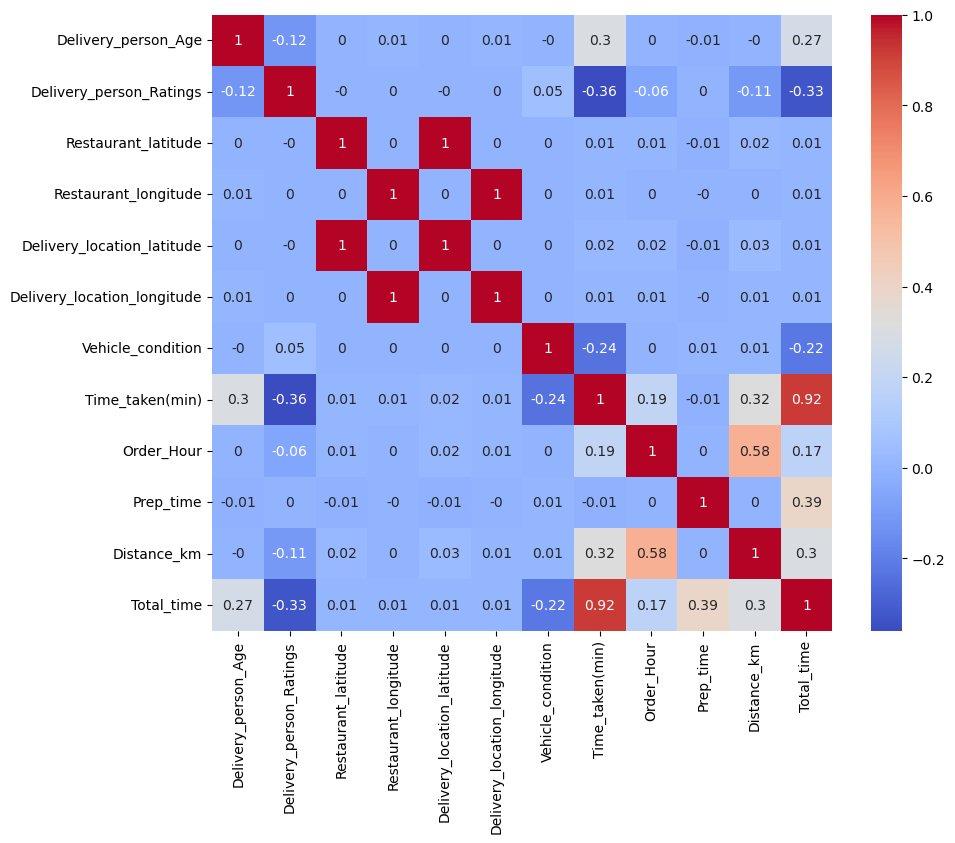

In [212]:
matriz = num.corr().round(2)

plt.figure(figsize = (10,8))
sns.heatmap(matriz, cmap = "coolwarm", annot = True)

In [213]:
# Ordenar correlación con variable objetivo.

correlaciones = matriz["Total_time"].sort_values(ascending=False)
print(correlaciones)

Total_time                     1.00
Time_taken(min)                0.92
Prep_time                      0.39
Distance_km                    0.30
Delivery_person_Age            0.27
Order_Hour                     0.17
Restaurant_latitude            0.01
Restaurant_longitude           0.01
Delivery_location_latitude     0.01
Delivery_location_longitude    0.01
Vehicle_condition             -0.22
Delivery_person_Ratings       -0.33
Name: Total_time, dtype: float64


In [214]:
filtro = num.corr()["Total_time"].abs() > 0.2

In [215]:
relevantes = matriz.loc[filtro, filtro]

<Axes: >

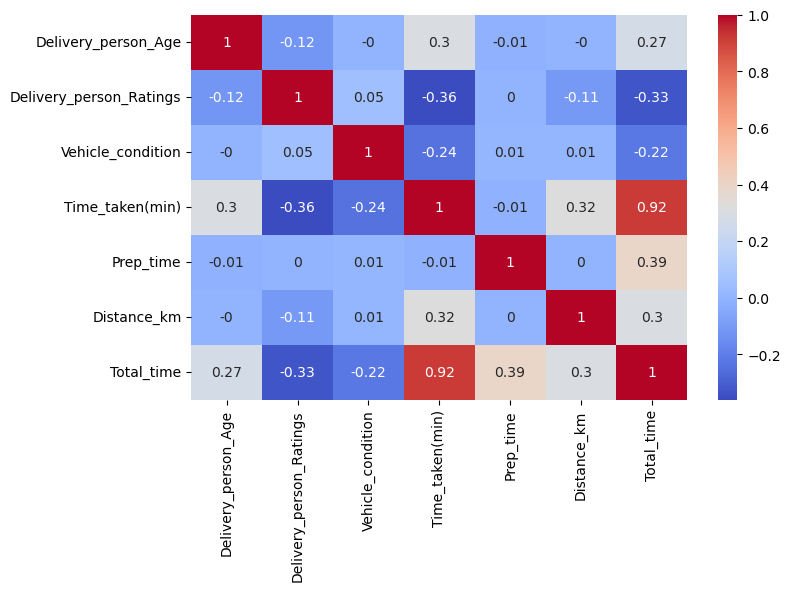

In [216]:
plt.figure(figsize = (8,5))
sns.heatmap(relevantes, cmap = "coolwarm", annot = True)

In [217]:
# observaciones:

# Total_time y Time_taken(min) (0.92) Esta es la relación más fuerte y positiva, siendo el tiempo total 
# del envio y el tiempo que se trado en llegar el pedido a su destino.

# Total_time y Prep_time (0.39) Indica que, si el tiempo de preparación del pedido es mayor, el tiempo 
# total de la entrega también aumente

# Total_time y Distance_km (0.30) Relación positiva a mayor Distancia de la entrega, mayor es el Tiempo Total 
# requerido.

# Total_time y Delivery_person_Age (0.27) Débil repartidores mayores tardan un poco más

# Total_time y Delivery_person_Ratings (-0.33) Existe una correlación negativa. Esto sugiere que cuando la 
# Calificación del Repartidor es más alta el Tiempo Total de la entrega tiende a ser más bajo

# Time_taken(min) y Delivery_person_Ratings (-0.36) Similar al punto anterior una mejor calificación está 
# asociada a un menor tiempo tomado para la entrega

# Total_time y Vehicle_condition (-0.22) correlación negativa débil, sugiere que una mejor Condición del 
# Vehículo podría estar asociada a un tiempo total ligeramente menor 

In [218]:
# Para reducir el Total_time, podemos enfocarnos en:

# Optimizar Time_taken(min) por su alta correlación.

# Mejorar las Delivery_person_Ratings (o quizás contratar a los repartidores mejor calificados) ya que
# están negativamente correlacionadas con el tiempo total.

# Reducir el Prep_time (si el problema está en la cocina o almacén) y, por supuesto, considerar el impacto 
# de la Distance_km

<Axes: xlabel='Time_taken(min)', ylabel='Total_time'>

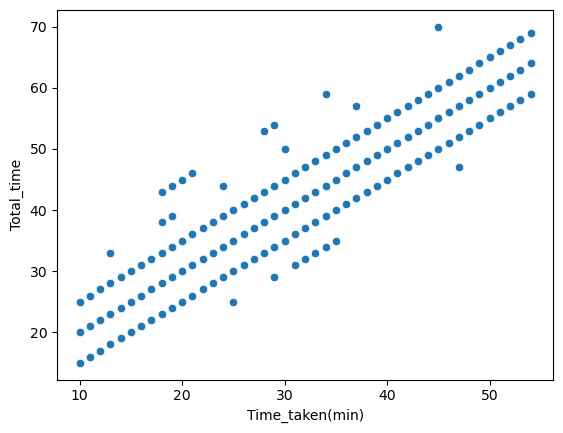

In [219]:
sns.scatterplot(data = data_train, x = "Time_taken(min)", y = "Total_time")

In [220]:
# puntos dispersos con una línea de tendencia clara, buena señal para modelos.

<Axes: xlabel='Prep_time', ylabel='Total_time'>

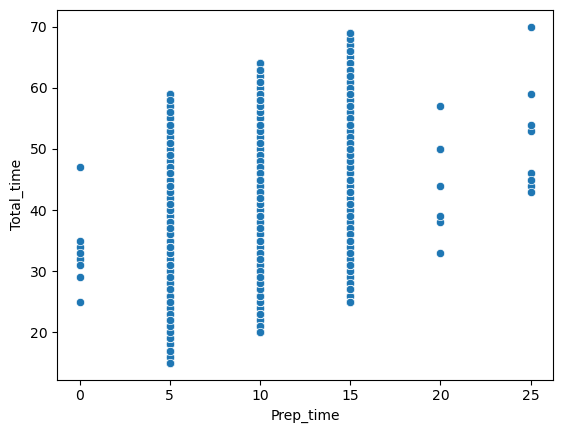

In [221]:
sns.scatterplot(data = data_train, x = "Prep_time", y = "Total_time")

In [222]:
# el tiempo de preparación si influye, pero no de forma continua puede ser útil como variable categórica

<Axes: xlabel='Distance_km', ylabel='Total_time'>

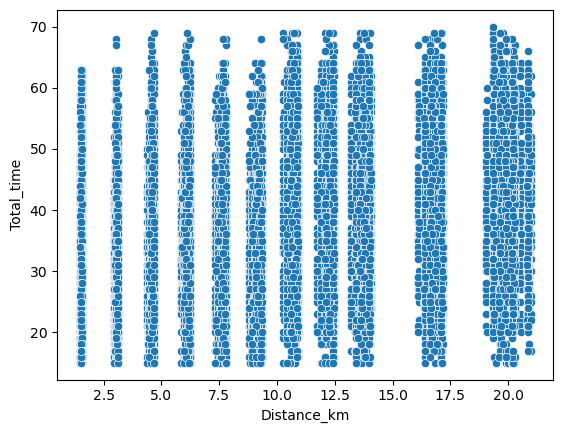

In [223]:
sns.scatterplot(data = data_train, x = "Distance_km", y = "Total_time")

In [224]:
# distancias mayores, la variabilidad aumenta

<Axes: xlabel='Delivery_person_Ratings', ylabel='Total_time'>

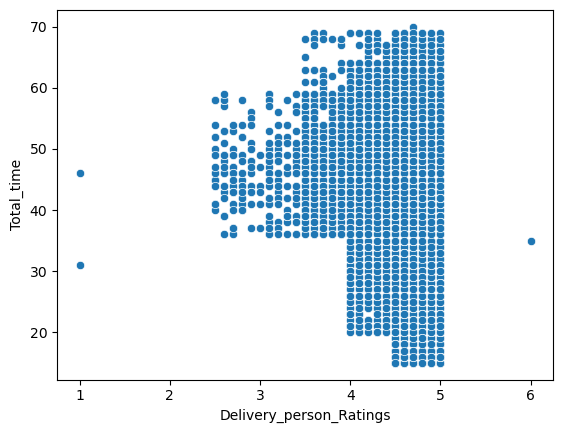

In [225]:
sns.scatterplot(data = data_train, x = "Delivery_person_Ratings", y = "Total_time")

In [226]:
# A medida que la calificación sube, el tiempo total tiende a bajar

<Axes: xlabel='Vehicle_condition', ylabel='Total_time'>

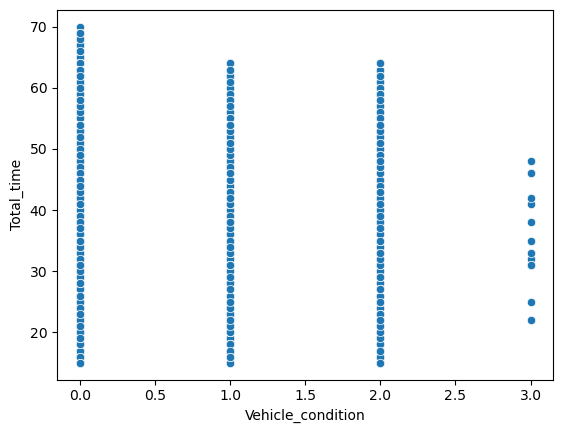

In [227]:
sns.scatterplot(data = data_train, x = "Vehicle_condition", y = "Total_time")

In [228]:
# No hay una caída clara en el tiempo conforme mejora la condición, pero sí se nota que los vehículos 
#en peor estado tienden a tener más entregas lentas

### KPIs y Métricas

In [229]:
# notas:
# Las métricas alimentan los KPIs

# Los KPIs (Indicadores Clave de Rendimiento) son métricas estratégicas que miden el progreso hacia objetivos específicos,
# mientras que las métricas son datos cuantitativos que describen el comportamiento o rendimiento sin necesariamente estar 
# ligados a un objetivo.

#### Por Rendimiento de repartidores

In [230]:
#Agrupar por repartidor y calcular tiempo promedio
repartidores = data_train.groupby(
    "Delivery_person_ID")["Total_time"].mean().reset_index()

In [231]:
repartidores_ordenados = repartidores.sort_values("Total_time")

In [232]:
# 5 más rápidos
print(repartidores_ordenados.head(5))

# 5 más lentos
print(repartidores_ordenados.tail(5))

    Delivery_person_ID  Total_time
746     KOLRES01DEL03    28.000000
413     GOARES06DEL03    28.888889
784     KOLRES15DEL02    29.666667
781     KOLRES14DEL02    30.083333
432     GOARES14DEL01    30.111111
    Delivery_person_ID  Total_time
796     KOLRES19DEL02    43.363636
33      AGRRES17DEL01    44.083333
60      ALHRES12DEL01    44.166667
752     KOLRES03DEL03    44.333333
660     KNPRES14DEL01    46.600000


<Figure size 800x500 with 0 Axes>

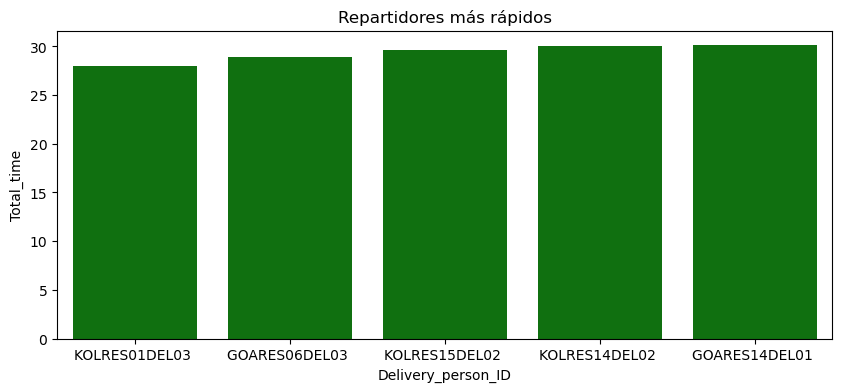

<Figure size 800x500 with 0 Axes>

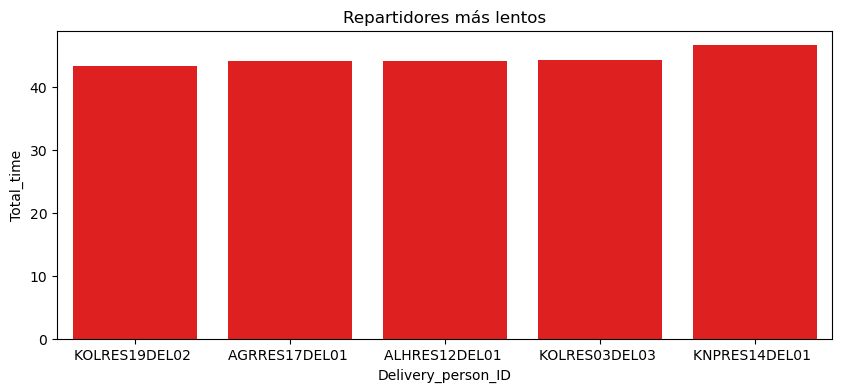

In [233]:
plt.figure(figsize = (8,5))
plt.figure(figsize=(10,4))
sns.barplot(x="Delivery_person_ID",
            y="Total_time",
            data=repartidores_ordenados.head(5),
            color ="green")
plt.title("Repartidores más rápidos")
plt.show()

plt.figure(figsize = (8,5))
plt.figure(figsize=(10,4))
sns.barplot(x="Delivery_person_ID", 
            y="Total_time", 
            data=repartidores_ordenados.tail(5),
            color ="red")

plt.title("Repartidores más lentos")
plt.show()

In [234]:
# Observaciones: 
#  los más rápidos tienen tiempos promedio de 28–30 minutos
#  Los más lentos superan los 43 minutos, llegando hasta 46
#  Hay una diferencia de 15–18 minutos, que puede impactar en satisfacción, eficiencia y costos

# Posibles soluciones operativas

# Asignar repartidores rápidos a zonas críticas o congestión alta
# Optimización de horarios, redistribuir turnos o reforzar personal en franjas lentas
# Mantenimiento preventivo o rotación de vehículos
# Ajustar tiempos de cocina o priorizar preparación en pedidos lentos
# Capacitación y feedback usando estos datos para dar retroalimentación personalizada a cada repartidor
# Crear un modelo que prediga el tiempo de entrega por repartidor, zona, hora y tipo de pedido
# Asignar pedidos de forma más eficiente y anticipar retrasos

In [235]:
# Número de entregas por repartidor
repartidores_entregas = (
    data_train.groupby("Delivery_person_ID")["Total_time"]
    .count()
    .reset_index()
    .rename(columns={"Total_time": "num_entregas"})
    .sort_values("num_entregas", ascending=False)
)

In [236]:
# Top 10 con más entregas
print(repartidores_entregas.head(10))

# Top 10 con menos entregas
print(repartidores_entregas.tail(10))

     Delivery_person_ID  num_entregas
598      JAPRES11DEL02             66
1156     VADRES11DEL02             65
595      JAPRES09DEL02             65
975     PUNERES01DEL01             65
576      JAPRES03DEL01             64
1110     SURRES11DEL01             64
532     INDORES08DEL02             64
1161     VADRES14DEL01             64
1065  RANCHIRES16DEL01             63
298   COIMBRES010DEL02             63
    Delivery_person_ID  num_entregas
398    GOARES010DEL03              7
743    KOLRES010DEL03              6
119    AURGRES13DEL03              6
215     BHPRES08DEL03              6
224     BHPRES15DEL03              6
401     GOARES01DEL03              6
728     KOCRES16DEL03              6
101    AURGRES05DEL03              6
770     KOLRES09DEL03              6
197    BHPRES010DEL03              4


In [237]:
# Observacion:
#  Quiénes son los repartidores más activos

#  Podemos concluir:
# Rápidos y con muchas entregas (repartidores estrella)
# Lentos y con pocas entregas  (candidatos a revisión o capacitación)

#### Por Rendimiento de restaurantes

In [238]:
# Agrupar por coordenadas del restaurante
restaurantes = data_train.groupby(
    ["Restaurant_latitude", "Restaurant_longitude"])["Total_time"].mean().reset_index()

In [239]:
restaurantes_ordenados = restaurantes.sort_values("Total_time")

In [240]:
# 5 más rápidos
print(restaurantes_ordenados.head(5))

# 5 más lentos
print(restaurantes_ordenados.tail(5))

     Restaurant_latitude  Restaurant_longitude  Total_time
236            22.552672             88.352885   32.121212
237            22.552996             88.352310   32.558824
108            15.546594             73.760431   33.103448
379            30.893244             75.821817   33.270270
111            15.561550             73.749092   33.354839
     Restaurant_latitude  Restaurant_longitude  Total_time
225            22.515082             88.367830   39.666667
370            30.873988             75.842739   39.962963
234            22.549100             88.400467   39.968750
360            30.332735             78.054222   40.743590
267            23.230791             77.437020   40.882353


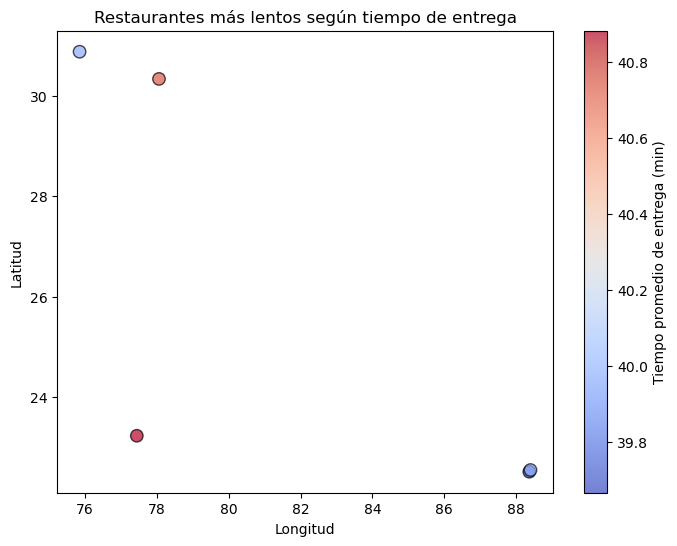

In [241]:
# Filtrar los 5 restaurantes más lentos
restaurantes_lentos = restaurantes_ordenados.tail(5)

# Graficar solo esos 5
plt.figure(figsize=(8,6))
scatter = plt.scatter(
    restaurantes_lentos["Restaurant_longitude"],
    restaurantes_lentos["Restaurant_latitude"],
    c=restaurantes_lentos["Total_time"],
    cmap="coolwarm",
    s=80,
    alpha=0.7,
    edgecolors="k"
)

plt.colorbar(scatter, label="Tiempo promedio de entrega (min)")
plt.title("Restaurantes más lentos según tiempo de entrega")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.show()

In [242]:
# Observaciones:
# Los puntos están espaciados, lo que indica que no hay una sola zona crítica, 
# sino que los restaurantes lentos están distribuidos en distintas regiones.

# Los restaurantes lentos no siempre lo son por ubicación; muchas veces el problema está en procesos internos
# y coordinación logística. Con ajustes en cocina, rutas y asignación de repartidores, puedes reducir minutos
# de diferencia.

# Posible soluciones:
# Revisar procesos internos si el restaurante está en zona eficiente pero tiene mal desempeño, 
# el problema está en cocina o gestión

### Por Pedidos

In [260]:
tiempo_promedio_taken = data_train["Time_taken(min)"].mean().round(2)
tiempo_promedio_taken

26.32

In [243]:
tiempo_promedio_pre = data_train["Prep_time"].mean().round(2)
tiempo_promedio_pre

9.98

In [244]:
# Tiempo total promedio de todos los pedidos
tiempo_promedio_total = data_train["Total_time"].mean().round(2)
tiempo_promedio_total

36.3

In [245]:
# Promedio por ciudad
promedio_ciudad = data_train.groupby("City", observed=True)["Total_time"].mean().reset_index()
promedio_ciudad 

,City,Total_time
0,Metropolitan,37.120947
1,Urban,33.471417


In [246]:
# Promedio por tipo de pedido
promedio_tipo = data_train.groupby("Type_of_order", observed=True)["Total_time"].mean().reset_index()
promedio_tipo

,Type_of_order,Total_time
0,Buffet,36.268546
1,Drinks,36.159000
2,Meal,36.461831
3,Snack,36.313892


In [247]:
# Promedio por franja horaria 
promedio_hora = data_train.groupby("Order_Hour", observed=True)["Total_time"].mean().reset_index()
promedio_hora

,Order_Hour,Total_time
0,0,32.005063
1,8,29.805140
2,9,29.496908
3,10,29.291758
4,11,36.386414
5,12,36.873633
6,13,37.511173
7,14,37.181692
8,15,33.376412
9,16,32.848297


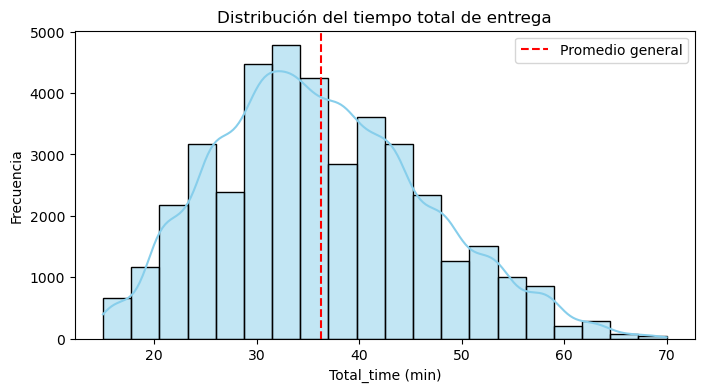

In [248]:
plt.figure(figsize=(8,4))
sns.histplot(data_train["Total_time"], bins=20, kde=True, color="skyblue")
plt.axvline(tiempo_promedio_total, color="red", linestyle="--", label="Promedio general")
plt.title("Distribución del tiempo total de entrega")
plt.xlabel("Total_time (min)")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()

In [249]:
# Observaciones:

# La mayoría de pedidos se concentran entre 30 y 38 minutos
# El promedio está en 36 min aproximadamente
# El sistema funciona razonablemente bien, pero hay pedidos que distorsionan el promedio

In [250]:
# Promedio general Tiempo de preparación (Prep_time)
prep_time_promedio = data_train["Prep_time"].mean().round(2)
prep_time_promedio

9.98

In [251]:
prep_por_tipo = (
    data_train.groupby("Type_of_order", observed=True)["Prep_time"]
    .mean()
    .reset_index()
    .sort_values("Prep_time")
)
prep_por_tipo

,Type_of_order,Prep_time
1,Drinks,9.950193
2,Meal,9.962822
3,Snack,10.000496
0,Buffet,10.011561


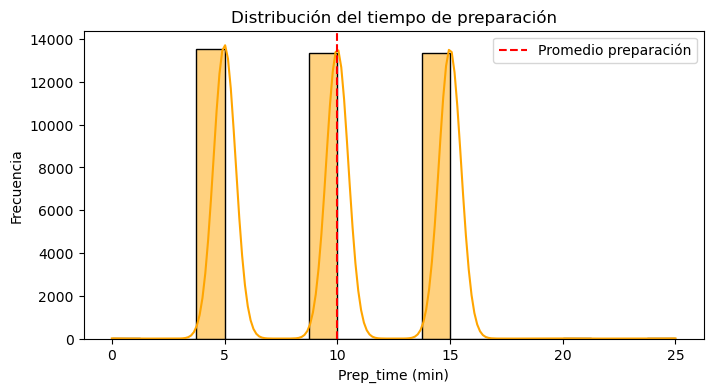

In [252]:
plt.figure(figsize=(8,4))
sns.histplot(data_train["Prep_time"], bins=20, kde=True, color="orange")
plt.axvline(prep_time_promedio, color="red", linestyle="--", label="Promedio preparación")
plt.title("Distribución del tiempo de preparación")
plt.xlabel("Prep_time (min)")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()

In [253]:
# Observaciones:

# La distribución no es simétrica tiene varios modos, es multimodal.
# - El promedio está en 10 min, pero hay muchos pedidos más rápidos (5 min) y otros más lentos 15+ min
# - Esto sugiere que el tipo de pedido o el restaurante influye mucho en el tiempo de preparación


### Por Clientes

In [254]:
# Calificación promedio general de repartidores (Delivery_person_Ratings)

rating_promedio = data_train["Delivery_person_Ratings"].mean().round(2)
rating_promedio

4.63

In [255]:
# Por Repartidor
rating_por_repartidor = (
    data_train.groupby("Delivery_person_ID")["Delivery_person_Ratings"]
    .mean()
    .reset_index()
    .sort_values("Delivery_person_Ratings", ascending=False)
)
rating_por_repartidor

,Delivery_person_ID,Delivery_person_Ratings
119,AURGRES13DEL03,4.866667
717,KOCRES13DEL01,4.864286
854,LUDHRES20DEL03,4.854545
640,KNPRES04DEL02,4.837500
426,GOARES12DEL01,4.836364
...,...,...
367,DEHRES05DEL02,4.412500
748,KOLRES02DEL02,4.372727
777,KOLRES13DEL01,4.366667
678,KNPRES20DEL01,4.307143


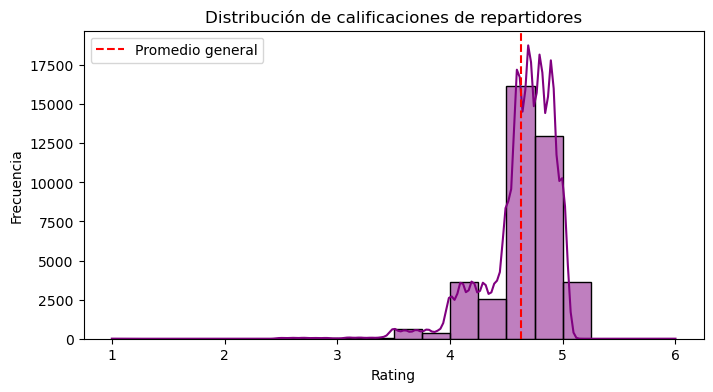

In [256]:
plt.figure(figsize=(8,4))
sns.histplot(data_train["Delivery_person_Ratings"], bins=20, kde=True, color="purple")
plt.axvline(rating_promedio, color="red", linestyle="--", label="Promedio general")
plt.title("Distribución de calificaciones de repartidores")
plt.xlabel("Rating")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()

In [257]:
# Obersrvaciones:

#   La distribución hacia la izquierda lo que indica que hay más repartidores con calificaciones 
# altas que bajas.
#   La concentración entre 4 y 5 sugiere que el servicio de entrega es bien valorado en general
# - Las calificaciones bajas (1–3) son poco frecuentes, pero conviene investigarlas para detectar
# casos críticos

In [258]:
data_train.City

0               Urban
1        Metropolitan
2               Urban
3        Metropolitan
4        Metropolitan
             ...     
45587    Metropolitan
45588    Metropolitan
45590    Metropolitan
45591    Metropolitan
45592    Metropolitan
Name: City, Length: 40256, dtype: category
Categories (2, object): ['Metropolitan', 'Urban']

In [259]:
data_train.to_csv("data_train_clean.csv", index=False)
data_test.to_csv("data_test_clean.csv", index=False)